# Méthodes de Monte Carlo: Projet

In [ ]:
install.packages("microbenchmark")
install.packages("plot3D")
install.packages("matlib")

In [2]:
library("microbenchmark")
library("plot3D")
library("matlib")

Warning message:
"package 'microbenchmark' was built under R version 3.6.2"Warning message:
"package 'plot3D' was built under R version 3.6.2"Warning message:
"package 'matlib' was built under R version 3.6.2"

## Exercice 1

### Partie I - Simulations de variables aléatoires

#### Question 1

#### a)

Générer des réalisations d'une variable aléatoire selon une uniforme de support  $[0,1]$ nécéssite d'utiliser la méthode de la fonction inverse. Ici, la loi de Gumble est continue de densité
$$ f(x)=\frac{1}{\beta}\exp(\exp(-\frac{x-\mu}{\beta}))\exp(-\frac{x-\mu}{\beta})$$ avec $\mu\in\mathbb{R}$ et $\beta\in \mathbb{R}_{+}^{*}$.
Elle est munie de la fonction de répartition suivante: $$F(x)=\exp(\exp(-\frac{x-\mu}{\beta}))$$


La méthode de la fonction inverse consiste à calculer la fonction inverse $F^{\leftarrow}(u):=\ inf\{t\in\mathbb{R},\ F(t)\geq u \}$  avec $u\in\left[0,1\right]$. puis de l'évaluer par $U \sim U[0,1]$. La méthode garantit que résultat de notre évaluation suit bien la loi de $\mathbf{X}$. 

Dans notre cas , la loi de Gumbel est continue on a donc $F^{\leftarrow}=F^{-1}$.

Un calcul rapide nous donne:

\begin{align}
F(x)&=y\\
\Leftrightarrow  \exp(-\exp(-\frac{x-\mu}{\beta}))&=y\\
\Leftrightarrow -\frac{x-\mu}{\beta}&=ln(-ln(y))\\
\Leftrightarrow  x=\mu-\beta ln(-ln(y))&=F^{-1}(y)\\
\end{align}

Voici le code de simulation de variables aléatoires i.i.d suivant la loi de Gumbel(1,2) d'après la méthode décrite ci-dessus:

In [3]:
simGumbel = function(m, a, b){
  u = runif(m, 0, 1)        #on simule n uniformes
  Fi = -b*log(-log(u))+a    #on évalue les uniformes par la fonction inverse
  return(Fi)
}

###### b)

Pour nous convaincre du résultat de la méthode de la fonction inverse nous allons user de plusieurs outils de comparaisons:

* L'histogramme de l'échantillon simulé
* La fonction de répartitions empirique de notre échantillon
* Le test de Kolmogorov-Smirnov

Une discussion sur la pertinence de ces différents outils s'impose:
Les deux premiers ont pour avantage de donner des représentations graphiques et nous permettent ainsi de nous donner une première idée du caractère Gumbélien de notre échantillon. 

En effet, si l'histogramme et notre fonction de répartition empiriques sont très différents de leurs homologues théoriques alors on peut conclure hâtivement que notre échantillon ne suit pas une loi de Gumbel. Toutefois, si les graphes des deux premiers outils de comparaison semblent similaires voire identiques on ne peut conclure sur le caractère Gumbélien de notre échantillon.

L'idéal serait de pouvoir quantifier notre confiance dans l'acceptation de cette hypothèse. D'où l'importance d'utiliser le test de  Kolomogorov-Smirnov. La p-value que nous renvoie ce dernier nous permet de quantifier la certitude de nos premiers résultats. 

Nous détaillons ci-dessous les codes des trois méthodes susmentionnées:

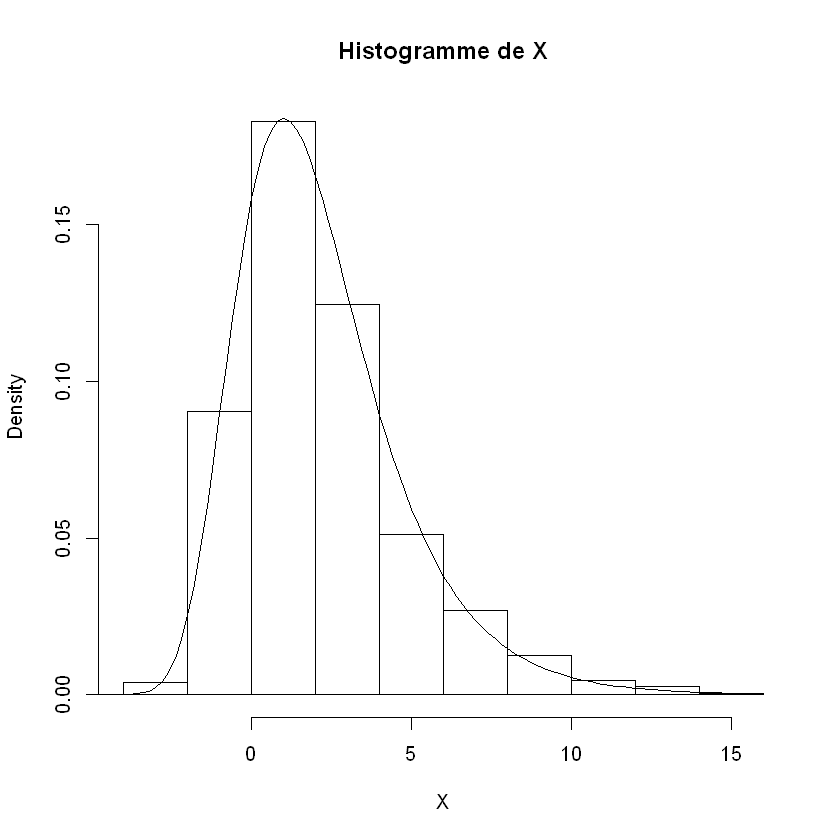

In [4]:
#### Comparaison de de l'histogramme de notre échantillon avec la densité f (ici pgumbel)

dgumbel = function(x, a = 1, b = 2){
  return((1/b)*exp(-exp(-(x-a)/b))*exp(-(x-a)/b))  # calcul de la densité d'une Gumbel de paramètres a,b ici fixés.
}

Fi = simGumbel(m=1000, a=1, b=2) #Échantillon de 1000 Gumbels

hist(Fi, freq  =  FALSE, main= "Histogramme de X", xlab= "X")   #Trace l'histogramme des valeurs

curve(dgumbel(x, a=1, b=2), -5, 15, add = T)   #Superpose la densité avec l'histogramme


On remarque que notre histogramme s'ajuste très bien à notre densité. Il n'y a aucune raison à ce stade de rejeter l'hypothèse, bian au contraire.

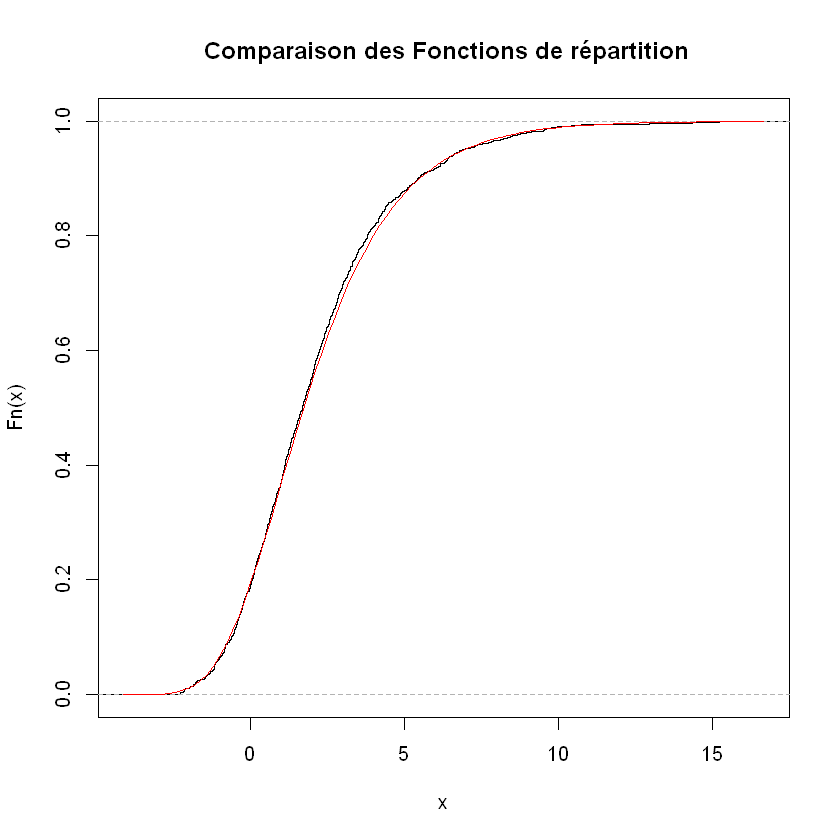

In [5]:
#### Comparaison de la fonction de répartion empirique de notre échantillon avec celle d'une loi Gumbel:

pgumbel = function(x, a = 1, b = 2){
  return(exp(-exp(-(x-a)/b)))         #calcul de la fonction de repartition d'une Gumbel
}
X = simGumbel(m=1000, a=1, b=2)    #simule un echantillon de taille 1000
plot(ecdf(X), main = " Comparaison des Fonctions de répartition")         # Trace fonction de repartition empirique
curve(pgumbel(x, a=1, b=2), add = TRUE, col = 2)# Trace la fonction de répartition d'une Gumbel et la superpose avec la fonction de répartition empirique

###### Analyse des résultats:

1. Dans le premier graphique, on remarque que l'histogramme de notre échantillon s'ajuste idéalement avec notre densité.


2. Même conclusion pour le graphique concernant la fonction de repartition empirique qui semble se confondre avec la fonction de repartition d'un loi de Gumbel(1,2).


3. Les premiers tests paraissent de bonne augure dans l'acceptation de l'Hypothèse que notre échantillon suit une loi de Gumbel. Néanmoins le test de Kolmogorov-Smirnov nous permettra de précisier notre confiance à l'aide de la p-value.

In [7]:
##### On teste nos hypothèses avec un test ( Kolmogorov-Smirnov)

X = simGumbel(m=1000, a=1, b=2) #Échantillon de taille 1000
ks.test(X, "pgumbel",  a=1,  b=2) #Éxecution du test de Kolmogorv-Smirnov de niveau 95 %


	One-sample Kolmogorov-Smirnov test

data:  X
D = 0.02284, p-value = 0.6739
alternative hypothesis: two-sided


##### Synthèse:

1. La p-valeur retournée par le test de Kolmogorv-Smirnov est bien supérieure à 0,05. On ne rejette donc pas l'hypothèse que notre échantillon suit une loi de Gumbel. La grande différence qui existe entre la p-valeur et notre niveau de rejet nous donne une grande confiance dans la croyance que notre échantillon suit bien une loi de Gumbel(1,2).


2. D'après l'étude de notre échantillon à l'aide des différents outils de comparaison, on accepte, sans grand risque, que l'échantillon simulé d'après la méthode de la fonction inverse suit bien une loi de Gumbel(1,2)

#### Question 2

#### a) 
Soient $\mathbf{X}_{(1)}=\max(\mathbf{X}_1,...,\mathbf{X}_n)$ et $\mathbf{X}_{(m)}=\min(\mathbf{X}_1,...,\mathbf{X}_m)$.
Pour calculer la densité de la loi jointe $(\mathbf{X}_{(1)},\mathbf{X}_{(m)})$ nous allons calculer les dérivées croisées de la fonction de répartition jointe.
Pour le calcul de la fonction de répartition il y a deux cas:
Soit $(x,y)\in\mathbb{R}^2$


* si $x \leq y$, on a:



\begin{align}
F_{\mathbf{X}_{(1)},\mathbf{X}_{(m)}}(x,y)&=\mathbb{P}(\mathbf{X}_{(1)}\leq x , \mathbf{X}_{(m)}\leq y)\\
&=\mathbb{P}(\mathbf{X}_{(m)}\leq y)-\mathbb{P}(x \leq \mathbf{X}_{(1)}\ ,\ \mathbf{X}_{(m)}\leq y)\\
&=\mathbb{P}({\bigcap}_{i=0}^m \mathbf{X}_{i}\leq y)-\mathbb{P}(x \leq {\bigcap}_{i=0}^m \mathbf{X}_{i}\leq y)\\
&=F(x)^m-(F(x)-F(y))^m \text{ avec  F  fonction de répartition d'une Gumbel(1,2)}
\end{align}


* si $y < x$, on a:


Cela signifie que $\mathbf{X}_{(m)} < \mathbf{X}_{(1)}$.
Ce qui est impossible d'où $F_{\mathbf{X}_{(1)},\mathbf{X}_{(m)}}(\mathbf{X},y)=0$


En définitive on obtient:
$$ F_{\mathbf{X}_{(1)},\mathbf{X}_{(m)}}(x,y) = F(x)^{m}-(F(x)-F(y))^{m}\mathbb{1}_{\{x \leq y\}} $$


En effectuant les dérivées croisées de $F$ on obtient:

$$ \frac{\partial F(x,y)}{\partial x \partial y}=m(m-1)(F(x)-F(y))^{m-2}f_\mathbf{X}(x)f_{\mathbf{Y}}(y)\mathbb{1}_{\{x\leq y\}}=f_{1,m}(x,y) $$

où $f_\mathbf{X}(x)$ et $f_Y(y)$ sont les densités de respectivement de $\mathbf{X}$ et $\mathbf{Y}$, indépdendantes et suivant une loi de Gumbel(1,2).


##### b)
$F_{X_{(1)},X_{(m)}}:\mathbb{R}^2 \rightarrow \mathbb{R}$ n'est pas inversible. 
Nous ne disposons donc pas des hypothèses nécéssaires pour appliquer la méthode de la fonction inverse pour simuler un échantillon selon $f_{1,m}$. 


De plus, on remarque que  
$$(F(x)-F(y))^{m-2}\mathbb{1}_{\{x\leq y\}}\leq 1$$
D'où, $$f_{1,n}(x,y)\leq m(m-1)g(x,y)$$

avec $g = f_{\mathbf{X}}f_{\mathbf{Y}}$ la densité jointe de $({\mathbf{X}},{\mathbf{Y}})$ couple de v.a  i.i.d suivant suivant la loi de Gumble(1,2). 
 
Étant donné cette majoration on peut appliquer l'algorithme d'acceptation-rejet.
Le principe de la méthode est d'effectuer des réalisations $z_i$ selon la lois $g$ qui vérifie $f_{1,n}\leq m(m-1)g$. À partir de ces la réalisations on génére des v.a uniformes conditionnellement aux  réalisations $z_i$ telles que $(\mathbf{U}|\mathbf{Z}=z_i)_i \sim \mathbf{U}\left[0,1\right]$. Le critère d'acceptation de nos réalisations est le suivant :on ne garde que les réalisations des uniformes qui se trouvent sous la courbe de . Ces dernières sont bel et bien des réalisations selon $$f_{1,n)$$ .
Une telle méthode garantit une probabilité d'acceptation égale à $\frac{1}{m(m-1)}$. Il nous faudra donc en moyenne $n*m(m-1)$ réalisations pour obtenir un échantillons  de taille n simulés selon la loi du couple $(\mathbf{X}_{(1)},\mathbf{X}_{(m)})$ .


Voici le code de l'algorithme d'acceptation-rejet:

In [9]:

ARminmaxGumbel = function(nb_pairs, m, a=1, b=2){
  cte  =  m*(m-1)                        #constante de majoration
  nb_trials  =  ceiling(nb_pairs * cte)  #Nombre d'essais moyen pour obtenir le nombre de paire souhaité sachant que la proba d'accepter est de 1/m(m-1).
  
  #on génére un couple selon la densite jointe f*f
  y1  =  simGumbel(nb_trials, a, b)
  y2  =  simGumbel(nb_trials, a, b)
  
  u  =  runif(nb_trials,  0, cte*dgumbel(y1, a, b)*dgumbel(y2, a, b)) # simulations de nb_trials Uniforme sur [0,cte*dgumbel(y1, a, b)*dgumbel(y2, a, b)]
  
  indicatrice =  ifelse(y1<y2,  1,  0)
  f1m_y  =  indicatrice*m*(m-1)*dgumbel(y1, a, b)*dgumbel(y2, a, b)*(pgumbel(y2, a, b)-pgumbel(y1, a, b))**(m-2) #densité du couple
  x1 = y1[ u < f1m_y ]       #critère d'acceptation
  x2 = y2[ u < f1m_y ]       #idem
  
#Étant donné que l'on fait une approximation du nombre de simulation nécssaires pour obtenir nb_pairs ,on complète notre échantillon pour qu'il soit de la taille souhaitée

    if (length(x1) >=  nb_pairs ){
    x1  =  x1 [1:nb_pairs]         #si le nombre de v.a simulé est plus grande que la taille n attendue on conserve les n premières v.a
    x2  =  x2 [1:nb_pairs]         #idem
  }else {                       #si ce n'est pas le cas: on complète. On applique la méthode d'acceptation rejet pour une seule simulation jusqu'à ce qu'on obtienne le nombre souhaité
    n_reste  = nb_pairs-length(x1)
    
    for (i in 1:n_reste) {
      y1  =  simGumbel(1, a, b)
      y2  =  simGumbel(1, a, b)
      u  =  runif(1,  0, cte*dgumbel(y1, a, b)*dgumbel(y2, a, b))
      
      indicatrice =  ifelse(y1<y2,  1,  0)
      f1m_y  =  indicatrice*m*(m-1)*dgumbel(y1, a, b)*dgumbel(y2, a, b)*
                    (pgumbel(y2, a, b)-pgumbel(y1, a, b))**(m-2)
      
      while ( u>=   f1m_y){
        
        y1  =  simGumbel(1, a, b)
        y2  =  simGumbel(1, a, b)
        u  =  runif(1,  0, cte*dgumbel(y1, a, b)*dgumbel(y2, a, b))
        
        indicatrice =  ifelse(y1<y2,  1,  0)
        f1m_y  =  indicatrice*m*(m-1)*dgumbel(y1, a, b)*dgumbel(y2, a, b)*
                  (pgumbel(y2, a, b)-pgumbel(y1, a, b))**(m-2)
        
      }
      x1  = append(x1,  y1)  # On ajoute un à un toute les v.a qui vérifient le critère d'acceptation
      x2  = append(x2,  y2)  #idem
    }
  }
  return(matrix(c(x1, x2), ncol  = 2))
}

##### Commentaires 
1. Nos ordinateurs peinent à retourner l'échantillon souhaité pour $m=100$ et $n=100$ en utilisant ARminmaxGumbel. Cette difficulté s'explique au regard de de la probabilité d'accepter qui est de $\frac{1}{9900}$. Ainsi pour simuler 100 paires de $((X_{(1)}^{i},X_{(m)}^{i}))_{i\geq1}$ il faut simuler en moyenne $990000$ Gumbel(1,2) ce qui est énorme !!! Nous limiterons donc notre étude à $n=100$ et $m=10$ en raison du manque de puissance de nos ordinateurs. Ce résultat nous montre à quel point il est important de ne pas avoir une constante majoration trop brutale de la densité dans le cas général.


2. La remarque précédente nous pousse à réflechir à une nouvelle méthode de simulation. Pour réaliser 100 simulations de $((X_{(1)},X_{(100)}))_{i\geq1}$ On peut penser à simuler $n$ échantillons de taille $m=100$ suivant une Gumbel(1,2) puis d'en extraire le minimum et le maximum. Dans cette méthode on a donc $n*m=100*100=10000$ de simulations de Gumbel(1,2) à réaliser. Ce qui est presque 100 fois plus efficace que l'algorithme d'acceptation rejet.
En voici le code ci-dessous.

In [10]:

minmaxGumbel = function(nb_pairs, m , a =1, b = 2){
    Min_vect = c() #créer un vecteur prêt à stocker les valeurs du min
    Max_vect = c() #idem pour le max
    
    # On simule nb_pairs*m gumbel , pour ensuite les ségmenter par échantillon de taille m dans une matrice
    Z = simGumbel(nb_pairs*m, a, b)  
    M= matrix(Z,nrow=nb_pairs,byrow=TRUE)
    
    # On stock nos résultats dans les vecteurs crées plus haut
    Min_vect= apply(M,1,FUN=min)
    Max_vect= apply(M,1,FUN=max)
    
 return(matrix(c(Min_vect, Max_vect), ncol  = 2))
}

eff1= mean(microbenchmark(minmaxGumbel(nb_pairs=100, m=10, a=1, b=2))$time)
print(paste0("temps d'éxécution minmaxGumbel ",eff1))

eff= mean(microbenchmark(ARminmaxGumbel(nb_pairs=100, m=10, a=1, b=2))$time)
print(paste0("temps d'éxécution minmaxGumbel ",eff))
print(paste0("temps relative d'éxécution: " ,eff1/eff))

[1] "temps d'éxécution minmaxGumbel 1351400"
[1] "temps d'éxécution minmaxGumbel 42884062"
[1] "temps relative d'éxécution: 0.0315128730109568"


##### Commentaires:


1. Le ratio produit par la fonction ci-dessus se réecrit de la forme suivante $\frac{temps\ d'éxecution\ algorihtme\ minmaxGumbel}{temps\ d'éxecution\ algorihtme\ ARminmaxGumbel}$ Ainsi plus  ce ratio est proche est petit par rapport à 1, plus le temps d'éxecution de ARminmaxGumbel est long face à celui de minmaxGumbel.  En particulier, dans notre cas pour $nb_{pairs}=100$ et $m=10$ est de l'odre de $10^{-2}$. Ainsi, ce ratio permet de confirmer notre intuition de départ: Pour simuler un échantillon de $((X_{(1)},X_{(10)}))_{i\geq1}$ minmaxGumbel est presque 100 fois plus rapide que ARminmaxGumbel.



2. Bien que minmaxGumbel soit plus performant que ARminmaxGumbel, il faut relativiser son efficacité. En effet il est important de garder à l'esprit que pour simuler un échantillon de taille n de réalisations de $(X_{(1)},X_{(m)})$ minmaxGumbel nécéssite de simuler $n*m$ Gumbels. Dans notre cas 9900 simulations sont ignorées( bien qu'elles fassent partie du processus de simulation de notre couple de v.a).

##### Vérification de ARminmaxGumbel:

Estimer les échantillons selon minmaxGumbel nous permet d'avoir une distribution précise. C'est pourquoi afin de voir si ARminmaxGumbel simule bien selon la loi demandée nous allons effectuer des comparaisons avec les réalisations de minmaxGumbel.

Pour ce faire, nous allons tracer l'histogramme 3D de nos distributions pour les comparer. Après divers éssais (et quelques plantages) nous avons remaqué que les histogrammes convergent lentement l'un vers l'autre. Nous avons donc choisi de simuler 10000 échanillons de taille 5 pour limiter le temps de calcul et obtenir des graphes relatviement significatifs.

Par ailleurs, nous effectuerons un test de Kolmogorov-Smirnov sur une estimations de $\Delta=\mathbf{X}_{(n)}-\mathbf{X}_{(1)}$( qui sera notre variable d'intrêt dans la seconde partie) selon nos deux méthodes. Bien entendu cette dernière démarche ne donne aucune information sur la loi du couple. Néanmoins, si le résultat du test réfute l'hypothèse selon laquelle $\Delta$ simulé avec les deux différents algorithmes possèdent la même loi alors on pourra affirmer que ARminmaxGumbel ne fonctionne pas correctement. 

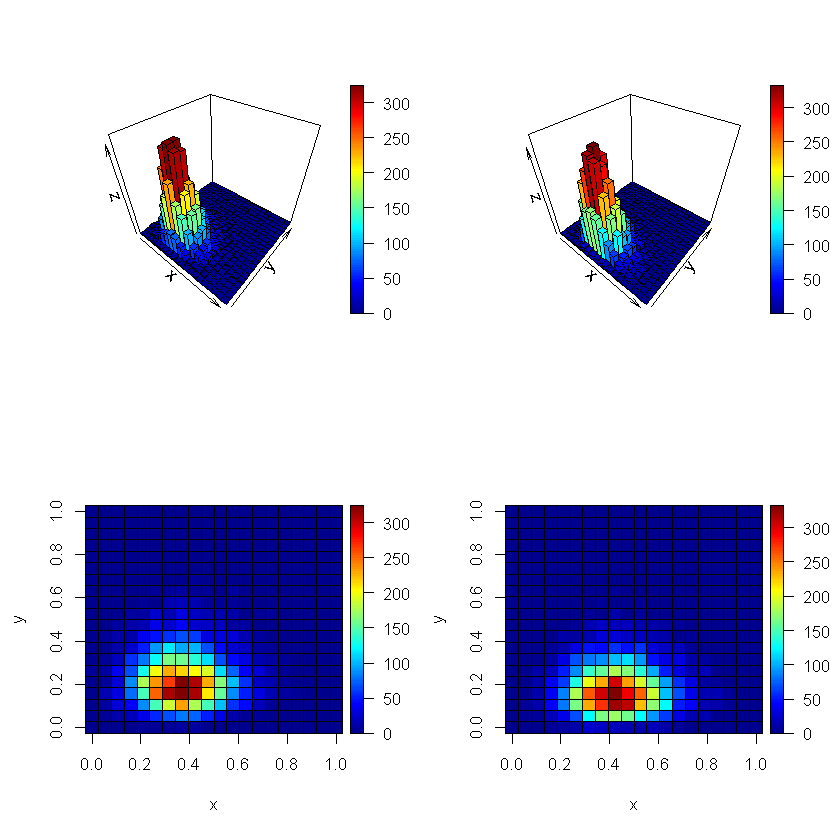

In [11]:
####Comparaison graphique des échantillons simulés (minmaxGumbel vs ARminmaxGumbel):

alea=200
#  On simule les données selon minmaxGumbel
set.seed(alea) #fixe l'aléa 
x1 <- minmaxGumbel(nb_pairs=10000,m=5,a=1,b=2)[,1]
y1 <- minmaxGumbel(nb_pairs=10000,m=5,a=1,b=2)[,2]

#  Calcul le nombre d'apparition de chaque valeur prise par le min et le max
x_c1 <- cut(x1, 20)
y_c1 <- cut(y1, 20)

#  Fusionne nos deux cuts et permet donc d'avoir le nombres d'apparitions du couple 
z1 <- table(x_c1, y_c1)


#  On simule les données selon ARminmaxGumbel
set.seed(alea) #fixe l'aléa
x2 <- ARminmaxGumbel(nb_pairs=10000,m=5,a=1,b=2)[,1]
y2 <- ARminmaxGumbel(nb_pairs=10000,m=5,a=1,b=2)[,2]

#  Calcul le nombre d'apparition de chaque valeur prise par le min et le max
x_c2 <- cut(x2, 20)
y_c2 <- cut(y2, 20)

#  Fusionne nos deux cuts et permet donc d'avoir le nombres d'apparitions du couple 
z2 <- table(x_c2, y_c2)

# Créer une matrice de taille 2x2 dans laquelle figurera
par(mfrow=c(2,2)) 

## Plot as a 3D histogram
hist3D(z=z1, border="black")

hist3D(z=z2, border="black")

##  Plot as a 2D heatmap:
image2D(z=z1, border="black")

image2D(z=z2, border="black")


In [12]:
#####Test de kolomogorv smirnov pour delta:

# Simulation des échantillons selon les deux algorithmes
x=minmaxGumbel(nb_pairs=100,m=10,a=1,b=2)
y=ARminmaxGumbel(nb_pairs=100,m=10,a=1,b=2)

#Calcul de delta pour chaque échantillons
delta1=x[,2]-x[,1]
delta2=y[,2]-y[,1]

#test de Komlogorov-Smirnov
ks.test(delta1,delta2)


	Two-sample Kolmogorov-Smirnov test

data:  delta1 and delta2
D = 0.17, p-value = 0.1111
alternative hypothesis: two-sided


#### Analyse:

Les histogrammes sont relativement proches l'un de l'autre. Malheureusement la puissance de nos ordinateurs ne nous permet pas de pouvoir augmenter la taille de notre échantillon pour effectuer une étude plus précise... Bien que cela ne soit pas suffisant pour affirmer que les lois simulées soient identiques et donc que ARminmax soit une bonne méthode de simulation, nous ne sommes pas non plus en mesure de réfuter cette hypothèse. De plus la p value du test de Kolomogorov est très supérieure à 0.05. Cela signifie que l'algorithme de rejet peut être utilisé dans la partie suivante vouée à l'étude de $\delta=\mathbb{E}\left[\Delta\right]$.

### Partie II - Estimation de l'étendue par la méthode de Monte Carlo

#### Question 1:

##### a)
  On cherche à obtenir une estimation de $\delta=\mathbb{E}[X]$ avec un précision de $\epsilon=10^{-2}$ au niveau de confiance $95 \%$. 
On s'attachera à donner un intervalle de confiance centré en $\delta$ à l'aide à l'aide de l'estimateur de Monte Carlo $\hat{\Delta}_{n}$ défini comme suit: $$\hat{\Delta}_n=\frac{1}{n}\sum_{i=1}^{n}(X^{i}_{(m)}-X^{i}_{(1)})$$ pour tout couple $((X^{i}_{(1)},X^{i}_{(m)}))_{i\geq 1}$ i.i.d.

Regardons les propriétés de $\hat{\Delta}_{n}$:
1. $\hat{\Delta}_{n}$ est trivialement non biasé par linéarité de l'espérance. 
2. $\hat{\Delta}_{n}$ est fortement consistant. En effet, on a:
\begin{align*}
X_{(m)}^2 &\leq (max_{1\leq i\leq n}(|X_i|))^2\\
&\leq (\sum_{i=1}^n |X_i|)^2\\
&\leq (\sum_{i=1}^n |X_i|^2)\ d'après\ l'inégalité\ de\ Jensen
\end{align*} 

Il s'agit d'une somme finie de variables suivant une loi de Gumbel(1,2) et appartiennent donc à $L^2$. Ainsi $X_{(m)}$ (et $\mathbf{X}_{(1)}$ par raisonnement symétrique) possède ont un moment d'ordre 2 fini. En vertu de l'inégalité de Cauchy-Schwartz on a: $$\mathbb{E}\left[|X_{(1)}|\right] \leq \mathbb{E}\left[|X_{(1)}|^2\right]\mathbb{P}(\Omega) < +\infty$$. Idem pour $X_{(n)}$.

Ainsi $X_{(1)}$ et $X_{(n)}$ sont dans $\mathcal{L}^1$ . On en déduite que $\Delta \in \mathcal(L)^1$. Comme somme de deux variable $\mathcal{L}^1$. On conclut par l'utilisation de la loi des grands nombres.




Plusieurs méthodes peuvent nous permettent d'aboutir à un intervalle de confiance vérifiant ce résultat. 
Nous nous attacherons à utiliser deux d'entre elles:

1. L'inégalité de Bienaymé-Tchebitchev
    * a) Utilisation d'une majoration théorique de la variance
    * b) Estimation de la variance par méthode de chauffe
    

2. Théorème Centrale Limite 
    * Estimation de la variance par méthode de chauffe



##### 1. Inégalité de Tchebytchev:
###### Majoration théorique

Nous rappelons que $\hat{\Delta}_n$ est un estimateur trivialement non biaisé appliquée à $((X^{i}_{(m)}-X^{i}_{(1)}))_{i\geq 1}$

D'après l'inégalite de Bienaymé-Tchebytchev on a:

\begin{align*}
\mathbb{P}(|\hat{\Delta}_n-\delta|\geq \epsilon) \leq var(\hat{\Delta}_n)=\frac{\sigma^2(\hat{\Delta}_n)}{n}=\frac{\sigma^2(\Delta)}{n\epsilon^2}
\end{align*}

L'objectif est de trouver la taille de l'échantillon $n$ telle que la probabilité pour $\delta$ d'être en dehors de l'intervalle $[\hat{\Delta}-\epsilon,\hat{\Delta}+\epsilon]$ soit  inférieure à $5 \% $.
On souhaite donc calculer

\begin{align}n\in \mathbb{N},\ \mathbb{P}(|\hat{\Delta}_n-\delta|\geq \epsilon) \leq 0,05
\end{align}

   Étant donné que l'on ne connait pas $var(\Delta)$ on va majorer la variance de $\Delta$.

Premièrement, on a:

\begin{align*}
\sigma^2(\Delta)&=\mathbb{E}[\Delta^2] -\mathbb{E}[\Delta]^2\\
&\leq \mathbb{E}[\Delta^2] \ \ \ \ \ car\ \mathbb{E}[\Delta]^2 \geq 0 \\
&= \mathbb{E}[X_{(1)}^2]+\mathbb{E}[X_{(m)}^2]-2\mathbb{E}[X_{(m)} X_{(1)}] \\
\end{align*}

De plus, on remarque que:

1. $\mathbb{E}[X_{(1)}^2]$ se calcule selon la loi marginale de $X_{(1)}$ de densité:
$$f_1(x)= \frac{\partial F(x,y)}{\partial x}=mF(x)^{m-1}f_X(x)\leq mf_X(x)$$. Ainsi on a : $\mathbb{E}[X_{(1)}^2]\leq m\mathbb{E}[X^2]$ avec X qui suit une loi de Gumbel(1,2).
Symétriquement on a $\mathbb{E}[X_{(m)}^2]\leq m\mathbb{E}[Y^2]$ avec X et Y i.i.d .



2. On a montré plus haut que $X_{(1)}$ et $ X_{(n)}$ sont dans $L^2$.


On peut donc appliquer l'inégalité de Cauchy-Schwartz. On obtient:
$$ -2\mathbb{E}[X_{(m)} X_{(1)}] \leq (\mathbb{E}[X_{(1)}^2]\mathbb{E}[X_{(m)}^2])^{\frac{1}{2}}$$


D'où:

\begin{align*}
\sigma^2(\Delta) &\leq \mathbb{E}[X_{(1)}^2]+\mathbb{E}[X_{(m)}^2]-2\mathbb{E}[X_{(m)} X_{(1)}]\\
&\leq n\mathbb{E}[X^2]+n\mathbb{E}[Y^2]+n\mathbb{E}[X^2]^{\frac{1}{2}}\mathbb{E}[Y^2]^{\frac{1}{2}}\\
&\leq 2m(var(X)+\mathbb{E}[X]^2)\ \ \ car\ X,Y\ i.i.d \\
&= 2m(\frac{4pi^2}{6} + (1+2\gamma)^2)\\
&= 2mC \ \ avec\ C=\frac{4pi^2}{6} + (1+2\gamma)^2
\end{align*} 


Finalement, on obtient: 

$$\mathbb{P}(|\hat{\Delta}_n-\delta|\geq \epsilon) \leq \frac{2mC}{n\epsilon^2}$$

On en déduit la valeur de $n$, pour $m=100=10^{2}$
$$ \frac{2*10^{6}C}{n}= 5*10^{-2} \Leftrightarrow n= 4*10^{7}*C$$



In [13]:
##### CODE qui renvoie les bornes de notre intervalles de confiances d'après la méthode de Bienaymé Tchebytchev.

Estim_delta_Tchebychev_minmax = function(m, a = 1, b = 2, eps = 10*{-2}){
  
    nb_realisations = 4*10^{7}*(pi^{2}*(3/4)+a+b*(-digamma(1))) # calcul du nombre de réalisations nécéssaire pour obtenir la précision demandée
    x = minmaxGumbel(nb_pairs=nb_realisations, m, a, b)  # On simule nb_pairs Gumbel(a,b)
    
    delta = mean(x[,2]-x[,1])             # calcul de l'estimateur de Monte-Carlo
    var=var(x)                           #Calcul de la variance de delta
    
    inf = mean-eps                       #borne inf de l'intervalle de confiance
    sup = mean+eps                       #borne sup de l'intervalle de confiance
  return(c(nb_pairs, inf, sup, delta, var))  #retourne un vecteur v=(borne inf, borne sup, nombre d'itérations, estimateur, variance de l'estimateur) 
}

nb_realisations= 4*10^{7}*(pi^{2}*(3/4)+1+2*(-digamma(1)))
print(paste0("Nombre de simulation nécéssaires pour obtenir une précision de epsilon: ",nb_realisations))

# Code identi au précédent à la différence que l'on simule selon ARminmaxGumbel et non plus minmaxGumbel
Estim_delta_Tchebychev_ARminmax = function(m= 100, a = 1, b = 2, eps = 10*{-2}){
  nb_pairs = 4*10^{7}*(pi^{2}*(3/4)+a+b*(-digamma(1)))
  x = minmaxGumbel(nb_pairs, n, a, b)
  mean = mean(x[,2]-x[,1])
  var=var(x)
  inf = mean-eps
  sup = mean+eps
  return(c(inf, sup,nb_pair,mean,var))
}



[1] "Nombre de simulation nécéssaires pour obtenir une précision de epsilon: 382265385.224803"


##### Commentaires et Utilisation d'une "chauffe" pour limiter le nombre de simulation nécéssaires pour parvenir à la précision demandée (méthode empirique)


Le nombre de simulations nécéssaire pour obtenir une estimation de précision $\epsilon$ est de l'ordre de 300 millions. le nombre de simulation élevé provient des majorations brutales successives  que l'on a eu à effectuer pour trouver n. En raison de ce nombre de simulation, il nous est impossible de calculer l'éfficacité relative des estimateurs pour une précision de $\epsilon$.


Ainsi, plutot que de majorer, essayons d'obtenir une estimation de $\sigma^2(\Delta)$  à l'aide d'une "période de chauffe". Soit $\hat{\sigma}$.
D'après l'inégalité de Bienaymé Tchebytchev on a alors:

$$\mathbb{P}(|\hat{\Delta}_n-\delta|\geq \epsilon) \leq \frac{\hat{\sigma}}{n\epsilon^2}$$


Le nombre de simulation nécéssaire pour avoir une précision d'ordre $\epsilon$ pour un niveau de confiance $95\%$ est de :

$$\frac{\hat{\sigma}}{n\epsilon^2}=0,05 \Leftrightarrow \frac{\hat{\sigma}}{0,05\epsilon^2}=n \Leftrightarrow \frac{10^6\hat{\sigma}}{5}=n \Leftrightarrow 2*10^5\hat{\sigma}=n$$



In [14]:
nombre_de_realisations_tchebytchev=function(nb_pairs_de_ref, m, eps , a, b){
    
    x  =   minmaxGumbel(nb_pairs_de_ref, m, a, b)   # Simulation de (nb_pairs_de_ref) gumbel
    
    delta  =  x[,2]-x[,1]                          # Calcul de delta

    var_estim =  var(delta)                         # approximation de la variance de delta
    
    q=qnorm(0.975,0,1)                              # retourne le quantile de niveau 97.5 % de la loi normale centrée réduite
    nb_realisations  =  var_estim/(eps^{2} * 0.05)  # Calcul du nombre de réalisations nécéssaires pour obtenir une precision de epsilon
    
    return(c(nb_realisations, var_estim))
}

algo_tchebytchev=nombre_de_realisations_tchebytchev(nb_pairs_de_ref=3000, m=100, eps = 10^{-2}, a=1, b=2)
nb_realisations = algo_tchebytchev[1]
var_estim= algo_tchebytchev[2]

print(paste0("Nombre de simulation nécessaires pour obtenir une précision de epsilon: ",nb_realisations))
print(paste0("Variance estimée pour ce n: ", var_estim))


estim_delta_tchebychev_minmax = function(nb_pairs_de_ref, m, eps = 10^{-2}, a = 1, b = 2 ){
  nb_pairs = nombre_de_realisations_tchebytchev(nb_pairs_de_ref, m, eps , a, b)
  x = minmaxGumbel(nb_pairs, m, a, b)[1]
  delta_hat = mean(x[,2]-x[,1])
  var=var(x)
  inf = mean-eps
  sup = mean+eps
  return(c(nb_pairs, delta_hat, var, inf, sup))
}




[1] "Nombre de simulation nécessaires pour obtenir une précision de epsilon: 1316701.46118059"
[1] "Variance estimée pour ce n: 6.58350730590293"


###### Commentaires:

À l'aide du code ci-dessus on observe que pour un nombre de chauffe de 3000, $\hat{\sigma}\simeq6$ on obtient donc $n\simeq1.2*10^6$.
En comparaison avec l'algorithme fondé sur l'inégalité de Bienaymé Tchebychev qui nécéssite un nombre de simulations de gumbel de l'ordre des centaines de millions, la méthode de chauffe nous permet d'économiser un facteur 100 de simulation ce qui est non négligeable.
Toute fois cela ne reste pas suffisant pour estimer $\delta$ en vue du niveau de puissance nos ordinateurs.


En effet, comme nous l'avons vu dans la première partie, simuler 10000 gumbel avait déjà un certain coût. Le million de simulation s'avère donc difficilement éxecutable.

##### 2. Intervalle de confiance asymptotique

##### Méthode expérimentale dite de "chauffe"

$\hat{\Delta}_n$ est dans $\mathcal{L}^2$ et consistant. En particulier on peut appliquer le théorème centrale limite et ainsi obtenir un intervalle de confiance asymptotique de niveau $95\%$ pour n suffisemment grand.

On a donc 
$$IC^{1-\alpha}_n=[\hat{\Delta}_n-q_{1-\alpha}\sqrt{\frac{\sigma^2(\Delta)}{n}},\hat{\Delta}_n+q_{1-\alpha}\sqrt{\frac{\sigma^2(\Delta)}{n}}]$$ avec $q_{1-\alpha}$ le quantile de niveau $1-\alpha$ de la loi $\mathcal{N}(0,1)$

Cet intervale a un niveau de précision $\epsilon$ ssi:

\begin{align*}
diam(IC^{1-\alpha}_n)&=\epsilon\\
\Leftrightarrow 2 q_{1-\alpha}\sqrt{\frac{\sigma^2(\Delta)}{n}}&=\epsilon\\
\Leftrightarrow 4 q_{1-\alpha}^2{\frac{\sigma^2(\Delta)}{\epsilon^2}}&=n
\end{align*}


Tout comme nous l'avons fait pour Bienaymé-Tchebychev, nous allons donner une "période de chauffe" pour estimer $\sigma^2$ puis à partir de cet estimation nous obtiendrons le n demandé.

In [15]:
nombre_de_realisation_ICA=function(nb_pairs_de_ref, m, eps, a, b){
    
    nb_pairs_de_ref = 3000  #initialisation du nombre de chauffe
    x  =   minmaxGumbel(nb_pairs_de_ref, m, a, b)# simulation selon le nombre de chauffe de Gumbel
    
    delta  =  x[, 2]-x[, 1] # calcul de delta
    
    var_estim =  var(delta) #estimation de la variance pour ce nombre de chauffe
    
    q=qnorm(0.975,0,1)
    nb_realisations = 4*(q^2 )*var_estim/eps^{2} # calcul du nombre  de réalisation nécessaires pour obtenir une precision de epsilon
    
 return(nb_realisations)
}

nb_realisations=nombre_de_realisation_ICA(nb_pairs_de_ref = 3000,m=100,eps = 10^{-2},a=1,b=2)



print(paste0("Variance estimée pour le nombre de chauffe choisi ", var_estim))
print(paste0("Nombre de simulation nécessaires pour obtenir une précision de epsilon: ",nb_realisations))



[1] "Variance estimée pour le nombre de chauffe choisi 6.58350730590293"
[1] "Nombre de simulation nécessaires pour obtenir une précision de epsilon: 1068686.88485119"


Étant donné le nombre de simulations demandées pour obtenir une estimation est de l'ordre de $nb_{pairs}=10^6$.
Comme chaque algorithme nécéssite la simulation de $nb_{pairs}$ $(X_{(1)}^{i},X_{(n)}^{i})$ selon minmaxGumbel ou ARminmax, il nous est impossible de calculer la variance relative des deux estimeurs.( Ce n'est pas faute d'avoir essayé, l'ordinateur a planté à plusieurs reprises). Nous donnons néanmois ci-dessous, une trace de code qui pourrait nous servir à une estimation d'un nombre plus petit de Gumbel.

In [16]:
ICA_asymptotique_minmaxGumbel=function(m, nb_pairs, a, b){
    
    #simulations du nb_pairs de minmax gumbel, ici nb_pairs= nb_réalisations, pour obtenir une precision de epsilon avec 
    x = minmaxGumbel(nb_pairs, m, a, b)
    
    #calcul de delta et de son estimateurs
    delta =  x[, 2]-x[, 1]
    delta_hat = mean(delta)
    
    #calcul de la variance de delta pour nb_pairs simulations
    sigma2 = var(delta)
    
    #Calcul des bornes de l'intervalle de confiance
    q=pnorm(0.975,0,1)
    inf = delta_hat - (q^2 )*sqrt(sigma2/nb_pairs)
    sup = delta_hat + (q^2 )*sqrt(sigma2/nb_pairs)
    
    return(c(delta_hat, sigma2, inf, sup))   
}



# Code identique à ICA_asymptotique_minmaxGumbel sauf que l'on simule selon ARminmaxGumbel

ICA_asymptotique_ARminmaxGumbel=function(m, nb_pairs, a, b){
    x  =   ARminmaxGumbel(nb_pairs, m, a, b)
    
    delta =  x[, 2]-x[, 1]
    delta_hat = mean(delta)
    
    var= var(delta)
    q=pnorm(0.975,0,1)
    
    inf = delta_hat - (q^2 )*sqrt(sigma2/nb_pairs)
    sup = delta_hat + (q^2 )*sqrt(sigma2/nb_pairs)
    
    return(c(delta_hat, sigma2, inf, sup))   
}

# en principe il faudrait éxécuter les commandes suivantes pour obtenir l'intervalle de confiance, la valeur de notre estimateurs et sa variance
# Nous ne le faisons pas du fait du manque de puissance de nos ordinateurs:

#ICA_minmax = ICA_asymptotique_minmaxGumbel(nb_pairs=nb_realisations,m=100,a=1,b=2)
#delta_hat_minmax = ICA_minmax[1]
#sigma2_minmax = ICA_minmax[2]
#inf_minmax = ICA_minmax[3]
#sup_minmax= ICA_minmax[4]
#print(paste0("Valeur estimateur minmax ", delta_hat_minmax))
#print(paste0("Variance estimateur Score a: ",sigma2_minmax))
#print(paste0("Intervalle de confiance Score a: [",inf_minmax,",",sup_minmax,"]"))

#ICA_ARminmax = ICA_asymptotique_ARminmaxGumbel(nb_pairs=nb_realisations,m=100,a=1,b=2)
#delta_hat_ARminmax = ICA_ARminmax[1]
#sigma2_ARminmax = ICA_ARminmax[2]
#inf_ARminmax = ICA_ARminmax[3]
#sup_ARminmax= ICA_ARminmax[4]
#print(paste0("Valeur estimateur minmax ", delta_hat_ARminmax))
#print(paste0("Variance estimateur Score a: ",sigma2_ARminmax))
#print(paste0("Intervalle de confiance Score a: [",inf_ARminmax,",",sup_ARminmax,"]"))

##### Question 2:

##### a)

#####  Méthode de la variabe de contrôle 

On définit l'estimateur de la variable de contôle de la manière suivante :

\begin{align*}
\widehat{\delta}_{n}(b)=\frac{1}{n} \sum_{k=1}^{n}\left[h\left(\mathbf{X}_{k}\right)-b\left\{h_{0}\left(\mathbf{X}_{k}\right)-m\right\}\right]\ avec \ m=\mathbb{E}[h_0(\mathbf{X})]
\end{align*}

Voici quelques propriétés de l'estimateurs:

1. D'après le cours cet estimateur est fortement consistant par la loi forte des grands nombres et linéarité de l'espérance et sans biais.

2. De plus on a :


\begin{align*} b^{\star}=\underset{b \in \mathbb{R}}{\arg \min } \operatorname{Var}\left[\hat{\delta}_{n}(b)\right]=\frac{\operatorname{Cov}\left[h(\mathbf{X}), h_{0}(\mathbf{X})\right]}{\operatorname{Var}\left[h_{0}(\mathbf{X})\right]}
\end{align*}


Pour calculer l'estimateur calculer la variable de contrôle il faut que l'on choisisse un $h_0$ tel dont on sache calculer  dont on sait calculer la moyenne : $m=\mathbb{E}[h_0(\mathbf{X})]$

Ainsi, le choix de la fonction Score $\mathcal{S}=\frac{\partial log\mathcal{L_n}}{\partial\theta}$ ,avec $\mathcal{L_n}$ la vraissemblace du modèle, apparait comme naturel.
En effet, $S$ vérifie $\mathbb{E}[\mathcal{S}(\mathbf{X})]=0$ pour n'importe quelle distribution. 

Dans le cas d'un échantillon $X_1....X_n$ selon la loi Gumbel , la fonction score derivée par rapport a $\beta $est donnée par:

\begin{align*}
\mathcal{S} (X_1, ...X_n)&=\sum_{i=0}^n\frac{(X_i-\mu)}{\beta^2}-\frac{X_i-\mu}{\beta^2} exp(-\frac{X_i-\mu}{\beta})-\frac{n}{\beta}
\end{align*}
  
La fonction score derivée par rapport a $\mu $ est donnée par:
\begin{align*} 
\mathcal{S} (X_1, ...X_n)=\sum_{i=0}^n \frac{1}{\beta}exp(-\frac{X_i-\mu}{\beta})+\frac{n}{\beta}
\end{align*}
Ainsi, pour $h_0=\mathcal{S}$ on a $m=0$, ce qui nous permet de définir l'estimateur suivant.

\begin{align*}
\widehat{\delta}_{n}(b)=\frac{1}{n} \sum_{k=1}^{n}\left[h\left(\mathbf{X}_{k}\right)-b^{T}\left\{\nabla_{\theta}log\mathcal{L_n}\left(\mathbf{X}_{k}\right)\right\}\right]\ \ avec \ \theta=(\alpha,\beta)\in\mathbb{R}^2 \ et\ b\ \in\mathbb{R}^2
\end{align*}

On remarque $$\mathbb{E}[\mathcal {S}(X)]=0\Leftrightarrow \mathbb{E}[\frac{\partial log(\mathcal{L_n})}{\partial\alpha}]=\mathbb{E}[\frac{\partial log(\mathcal{L_n})}{\partial\beta}]=0$$

On dispose alors de 3 choix pour $h_0$ :
* $h_0=\frac{\partial log(\mathcal{L_n})}{\partial\beta}$ 
* $h_0=\frac{\partial log(\mathcal{L_n})}{\partial\alpha}$ 
* $h_0=\nabla_{\theta}log\mathcal{L_n}=(\frac{\partial log(\mathcal{L_n})}{\partial\alpha},\frac{\partial log(\mathcal{L_n})}{\partial\beta})$ 

Voyons quels sont ceux qui nous donnent les meilleurs résultats.


In [40]:
#### Code Score B:
Score_b = function(x, a = 1, b = 2){
  return(sum((x-a)/b^{2}-(x-a)/b^{2}*exp(-(x-a)/b)-1/b))
}

 


estim_k_score_b = function(m =  100,   nb_pairs, a = 1, b = 2){
  
  # Création des vecteurs qui vont stocker les valeurs des min, max et du score 
  Min_vect = c()
  Max_vect = c()
  h_0 = c()
  
  # Simulation de nb_pairs échantillons de taille m
  Z = simGumbel(nb_pairs*m, a, b)
  M = matrix(Z,nrow=nb_pairs,byrow=TRUE)
  
  # Calcul du min et max de chaque échantillon + calcul de delta
  Min_vect = apply(M,1,FUN=min)
  Max_vect = apply(M,1,FUN=max)
  delta = Max_vect-Min_vect
  
  # evaluation de la fonction score de notre échantillon
  h_0 =  apply(M,1,FUN=Score_b)
  
  #Cacul de la constante b_star
  cte = cov(h_0, delta)/var(h_0)
  
  return(cte)
}
k=estim_k_score_b(m =  100,   nb_pairs=100, a = 1, b = 2)

 


estim_var_controle_Score_b= function(m  =  100,   nb_pairs, a = 1, b = 2){
  
  # Création des vecteurs qui vont stocker les valeurs des min,max et du score
  Min_vect = c()
  Max_vect = c()
  h_0 = c()  
  
  # Calcul de la constante b_star
  k = estim_k_score_b(m, nb_pairs, a, b)
  
  # Simulation de nb_pairs échantillons de taille m
  Z = simGumbel(nb_pairs*m, a, b)
  M = matrix(Z,nrow=nb_pairs,byrow=TRUE)
  
  # Calcul du min et max de chaque échantillon + calcul de delta
  Min_vect = apply(M,1,FUN=min)
  Max_vect = apply(M,1,FUN=max)
  delta = Max_vect-Min_vect
  
  # evaluation de la fonction score de notre échantillon
  h_0 = apply(M,1,FUN=Score_b)
  
  #evaluation de la statistique de la variable de contrôle + calcul de sa variance
  estim_controle =  mean(delta-k*(h_0))
  var_estim =  var (delta-k*(h_0))
  
  #evaluation des bornes de l'intervalle de confiance
  inf=estim_controle-qnorm(0.975,0,1)*sqrt(var_estim/nb_pairs)
  sup=estim_controle+qnorm(0.975,0,1)*sqrt(var_estim/nb_pairs)
  
  #calcul de la covariance entre delta et la fonction score b
  coR= cor(delta,h_0)
  
  return(c(estim_controle, var_estim, inf, sup, coR^2))
}

 

controle_Score_b=estim_var_controle_Score_b(m  =  100,   nb_pairs = 100, a = 1, b = 2)
delta_ctrl_b=controle_Score_b[1]
sigma2_b=controle_Score_b[2]
inf_b=controle_Score_b[3]
sup_b=controle_Score_b[4]
coR_b=controle_Score_b[5]

 

print(paste0("Valeur estimateur Score_b: ",delta_ctrl_b))
print(paste0("Variance estimateur Score_b: ",sigma2_b))
print(paste0("Intervalle de confiance Score_b: [" ,inf_b, "," ,sup_b, "]"))
print(paste0("Carré du Coéfficient de correlation entre Score_b et delta: ", coR_b))

 

### score A:

 

Score_a = function(x, a=1, b=2){
  return(sum(-1/b*exp(-(x-a)/b)+1/b))
}

 

# Fonction qui estime b_star (=la constante qui minimise la variance de l'estimateur) avec h_0=Score_a

 

estim_k_score_a = function(m , nb_pairs, a , b ){
  
  # Création des vecteurs qui vont stocker les valeurs des min, max et du score 
  Min_vect = c()
  Max_vect = c()
  h_0 = c()
  
  # Simulation de nb_pairs échantillons de taille m
  Z = simGumbel(nb_pairs*m, a, b)
  M = matrix(Z,nrow=nb_pairs,byrow=TRUE)
  
  # Calcul du min et max de chaque échantillon + calcul de delta
  Min_vect = apply(M,1,FUN=min)
  Max_vect = apply(M,1,FUN=max)
  delta = Max_vect-Min_vect
  
  # evaluation de la fonction score de notre échantillon
  h_0 =  apply(M,1,FUN=Score_a)
  
  #Cacul de la constante b_star
  cte = cov(h_0,  delta)/var(h_0)
  
  return(cte)
}

 

k=estim_k_score_a(m =  100,   nb_pairs=100, a = 1, b = 2) #ici k=b_star

 


estim_var_controle_Score_a = function(m ,   nb_pairs, a , b ){
  
  # Création des vecteurs qui vont stocker les valeurs des min,max et du score
  Min_vect = c()
  Max_vect = c()
  h_0 = c()  
  
  # Calcul de la constante b_star
  k = estim_k_score_a(m, nb_pairs, a, b)
  
  # Simulation de nb_pairs échantillons de taille m
  Z = simGumbel(nb_pairs*m, a, b)
  M = matrix(Z,nrow=nb_pairs,byrow=TRUE)
  
  # Calcul du min et max de chaque échantillon + calcul de delta
  Min_vect = apply(M,1,FUN=min)
  Max_vect = apply(M,1,FUN=max)
  delta = Max_vect-Min_vect
  
  # evaluation de la fonction score de notre échantillon
  h_0 = apply(M,1,FUN=Score_a)
  
  #evaluation de la statistique de la variable de contrôle + calcul de sa variance
  estim_controle =  mean(delta-k*(h_0))
  var_estim =  var (delta-k*(h_0))
  
  #evaluation des bornes de l'intervalle de confiance
  inf=estim_controle-qnorm(0.975,0,1)*sqrt(var_estim/nb_pairs)
  sup=estim_controle+qnorm(0.975,0,1)*sqrt(var_estim/nb_pairs)
  
  #calcul de la covariance entre delta et la fonction score a
  coR = cor(delta,h_0)
  
  return(c(estim_controle, var_estim, inf, sup, coR^2))
}

 

controle_Score_a=estim_var_controle_Score_a(m  =  100,   nb_pairs = 100, a = 1, b = 2)
delta_ctrl_a=controle_Score_a[1]
sigma2_a=controle_Score_a[2]
inf_a=controle_Score_a[3]
sup_a=controle_Score_a[4]
coR_a=controle_Score_a[5]

 

print(paste0("Valeur estimateur Score_a: ",delta_ctrl_a))
print(paste0("Variance estimateur Score_a: ",sigma2_a))
print(paste0("Intervalle de confiance Score_a: [",inf_a,",",sup_a,"]"))
print(paste0("Carré du Coéfficient de correlation Score_a et delta: ", coR_a))

 


#### Score Multidim

 

##### Variable de contrôle multdimensionnelle

 

estim_k_multidim = function(m , nb_pairs, a, b ){
  
  # Simulation de nb_pairs echantillons de taille m (lignes de la matrice = un échantillon de taille m)
  Z = simGumbel(m*nb_pairs, a, b)
  M=matrix(Z,nrow=nb_pairs)
  
  # evaluation du min,max, Score a, score B 
  Min_vect = apply(M,1,FUN=min)
  Max_vect = apply(M,1,FUN=max)
  h_0 = apply(M,1,FUN=Score_a)
  h_1 = apply(M,1,FUN=Score_b)
  
  # Calcul de delta
  delta = Max_vect-Min_vect
  
  # Calcul du gradient
  m = matrix(c(h_0, h_1), ncol = 2)
  
  # Calcul de la matrice de variance covariance du gradient
  cov_inv = inv(cov(m))
  
  #calcul de la matrice de covariance du gradient et delta
  cov1 = c(cov(h_0, delta), cov(h_1, delta))
  coR= (1/var(delta))*t(cov1) %*% cov_inv %*% cov1

  return(c(cov_inv %*% cov1, coR ) )  #retourne le produit matriciel des deux matrices 
}

 

estim_var_controle_multidim = function(m,   nb_pairs, a , b){
  
  # Simulation de nb_pairs echantillons de taille m (lignes de la matrice = un échantillon de taille m)
  Z = simGumbel(m*nb_pairs, a, b)
  M=matrix(Z,nrow=nb_pairs)
  
  # evaluation de min,max, Score a, score B
  Min_vect = apply(M,1,FUN=min)
  Max_vect = apply(M,1,FUN=max)
  h_0 = apply(M,1,FUN=Score_a)
  h_1 = apply(M,1,FUN=Score_b)
  
  #calcul du delta des échantillons
  delta = Max_vect-Min_vect
  
  #calcul de la du vecteur qui minimise la variance par la fonction estim_k_multidim
  k1 = estim_k_multidim(m, nb_pairs, a, b) [1]
  k2 = estim_k_multidim(m, nb_pairs, a, b) [2]
  k = c(k1, k2)
  
  #Exection du produit matriciel, pour évaluer l'estimateur ainsi que sa variance
  m = matrix(c(h_0, h_1), ncol = 2)
  
  z=delta-m%*%k
  estim_controle = mean(z)
  var_estim = var(z)
  
  #évaluation des bornes de l'intervalle de confiance
  inf=estim_controle-qnorm(0.975,0,1)*sqrt(var_estim/nb_pairs)
  sup=estim_controle+qnorm(0.975,0,1)*sqrt(var_estim/nb_pairs)
  
  #calcul du coefficient de correlation entre 
  
  coR =  estim_k_multidim(m, nb_pairs, a, b) [3]
  return(c(estim_controle, var_estim,inf,sup,coR ))
}

 

controle_multidim=estim_var_controle_multidim(m  =  100,   nb_pairs = 100, a = 1, b = 2)
delta_hat_multidim=controle_multidim[1]
sigma2_multidim=controle_multidim[2]
inf_multidim=controle_multidim[3]
sup_multidim=controle_multidim[4]

 

print(paste0("Valeur estimateur multidim: ",delta_hat_multidim))
print(paste0("Variance estimateur multidim: ",sigma2_multidim))
print(paste0("Intervalle de confiance multidim: [",inf_multidim,",",sup_multidim,"]"))

[1] "Valeur estimateur Score_b: 13.5555259424262"
[1] "Variance estimateur Score_b: 5.6659900002206"
[1] "Intervalle de confiance Score_b: [13.088989049305,14.0220628355473]"
[1] "Carré du Coéfficient de correlation entre Score_b et delta: 0.105976311983586"
[1] "Valeur estimateur Score_a: 13.2356020995442"
[1] "Variance estimateur Score_a: 6.5641873500073"
[1] "Intervalle de confiance Score_a: [12.7334461935112,13.7377580055771]"
[1] "Carré du Coéfficient de correlation Score_a et delta: 0.0133574261140972"
[1] "Valeur estimateur multidim: 13.4360225439088"
[1] "Variance estimateur multidim: 4.0748898959684"
[1] "Intervalle de confiance multidim: [13.0403772263045,13.8316678615132]"


##### b)

##### Commentaires:

Chacune des méthodes semble approximer avec un degrès de précision $\delta$ du même ordre. L'estimateur de la variable de contrôle est toujours roche de 13.5 avec une variance proche de 6.  Calculons leurs efficacités relatives pour voir si ces méthodes sont plus performantes que celle de Monte-Carlo.


On definit l'efficacité relative de l'estimateur Y issu de l'algo (f), par rapport à la méthode de Monte carlo de la manière suivante:


$$éfficacité\ relative (f) =\ \frac{(temps\ d'éxécution\ de\ l'algorithme\ de\ M-C)*(variance\ de\ l'estimatateur\ de\ M-C)}{ (temps\ d'éxécution\ de\ l'algorithme\ de\ f)*(variance\ de\ l'estimatateur\ Y)}$$

In [42]:
#CALCULS DES EFFICACITÉS RELATIVES ENTRE LA LA METHODE DE LA VARIABLE DE CONTRÔLE (AUX FONCTIONS SCORE) ET LA MÉTHODE DE MONTE CARLO CLASSIQUE

############ efficacité relative Monte_carlo_Score_b

efficacite_relative_Score_b_Monte_carlo= function(nb_fois, m , nb_pairs, a = 1, b = 2){
    
    n=nb_pairs
    mu=a
    beta=b
        
    # effectue une moyenne du temps d'éxécution sur "nb_fois" éxécutions pour la fonction estim_var_controle_Score_b
    benchmark_Score_b  =  mean(microbenchmark(estim_var_controle_Score_b(m , nb_pairs , a , b ), times = nb_fois)$time)
  
    # variance moyenne de sur "nb_fois" appels à la variable de contrôle avec h_0= Score_b
    var_Score_b  =  mean(sapply(rep(m, nb_fois), estim_var_controle_Score_b,nb_pairs=n, a=mu , b=beta)[2,])

  # effectue une moyenne du temps d'éxécution sur "nb_fois" éxécutions pour la fonction ICA_asymptotique_minmaxGumbel
  benchmark_Monte_Carlo  =  mean(microbenchmark(ICA_asymptotique_minmaxGumbel(m , nb_pairs , a , b ),times= nb_fois)$time)
  
  #variance moyenne sur "nb_fois" appels  à la de l'estimateur de monte carlo
    var_Monte_Carlo =  mean(sapply(rep(m, nb_fois), ICA_asymptotique_minmaxGumbel, nb_pairs=n, a=mu , b=beta )[2,])
  
  print(paste0("Variance moyenne de  Monte Carlo vs variable de contrôle score b:",
               var_Monte_Carlo," vs ", var_Score_b ))


return((benchmark_Monte_Carlo*var_Monte_Carlo)/(benchmark_Score_b*var_Score_b))
}


eff_Score_b_MC=efficacite_relative_Score_b_Monte_carlo(nb_fois=100, nb_pairs=100, m=100, a=1, b=2)
print(paste0(" Efficacité relative:  Monte Carlo vs variable de contrôle Score b: ", eff_Score_b_MC))



########## efficacite relative score_a / Monte carlo

efficacite_relative_Score_a_Monte_carlo= function(nb_fois, m , nb_pairs, a = 1, b = 2){
    n=nb_pairs
    mu=a
    beta=b
    
  benchmark_Score_a  =  mean(microbenchmark(estim_var_controle_Score_a(m , nb_pairs , a , b ), times = nb_fois)$time)
  var_Score_a  =  mean(sapply(rep(m, nb_fois), estim_var_controle_Score_a,nb_pairs=n, a=mu , b=beta)[2,])

  
  benchmark_Monte_Carlo  =  mean(microbenchmark(ICA_asymptotique_minmaxGumbel(m , nb_pairs , a , b ),times= nb_fois)$time)
  var_Monte_Carlo =  mean(sapply(rep(m, nb_fois), ICA_asymptotique_minmaxGumbel, nb_pairs=n, a=mu , b=beta )[2,])

    print(paste0("Variance moyenne de Monte Carlo vs  variable de contrôle score a: ",
                 var_Monte_Carlo," vs ", var_Score_a ))

return((benchmark_Monte_Carlo*var_Monte_Carlo)/(benchmark_Score_a*var_Score_a))
}

eff_Score_a_MC=efficacite_relative_Score_a_Monte_carlo(nb_fois=100, nb_pairs=100, m=100, a=1, b=2)
print(paste0(" Efficacité relative: Monte Carlo vs  variable de contrôle Score_a :  ",
             eff_Score_a_MC))


############ efficacite relative Score multidim/ Montecarlo:

efficacite_relative_Score_multidim_Monte_carlo= function(nb_fois, m , nb_pairs, a = 1, b = 2){
    n=nb_pairs
    mu=a
    beta=b
    
  benchmark_Score_multidim  =  mean(microbenchmark(estim_var_controle_multidim(m , nb_pairs , a , b ),times= nb_fois)$time)
  var_Score_multidim =  mean(sapply(rep(m, nb_fois), estim_var_controle_multidim, nb_pairs=n, a=mu , b=beta )[2,])
  
  benchmark_Monte_Carlo  =  mean(microbenchmark(ICA_asymptotique_minmaxGumbel(m , nb_pairs , a , b ),times= nb_fois)$time)
  var_Monte_Carlo =  mean(sapply(rep(m, nb_fois), ICA_asymptotique_minmaxGumbel, nb_pairs=n, a=mu , b=beta )[2,])
  
  print(paste0("Variance moyenne de Monte Carlo vs  variable de contrôle score multidim : ", 
               var_Monte_Carlo," vs ", var_Score_multidim ))


return((benchmark_Monte_Carlo*var_Monte_Carlo)/(benchmark_Score_multidim*var_Score_multidim))
}

eff_Score_multidim_MC=efficacite_relative_Score_multidim_Monte_carlo(nb_fois=100, nb_pairs=100, m=100, a=1, b=2)
print(paste0(" Efficacité relative: Monte Carlo vs  variable de contrôle Score_multidim:  ",
             eff_Score_multidim_MC))



[1] "Variance moyenne de  Monte Carlo vs variable de contrôle score b:6.69330001620027 vs 5.91930423597451"
[1] " Efficacité relative:  Monte Carlo vs variable de contrôle Score b: 0.294545061127081"
[1] "Variance moyenne de Monte Carlo vs  variable de contrôle score a: 6.77434548818255 vs 6.85080109873097"
[1] " Efficacité relative: Monte Carlo vs  variable de contrôle Score_a :  0.197185659927126"
[1] "Variance moyenne de Monte Carlo vs  variable de contrôle score multidim : 7.00800973457538 vs 5.74555433706936"
[1] " Efficacité relative: Monte Carlo vs  variable de contrôle Score_multidim:  0.113354908491889"


##### Remarques

On constate que l'éfficacité relative entre la méthode de Monte-Carlo et la méthode de la variable de contrôle dont la variable de contrôle est une des fonctions Score est toujours inférieure à 1.

Cette dernière est proche de 0.6 Cela signifie que la méthode de Monte-Carlo est plus perfomante que la méthode de la variable de contrôle dont le contrôle est la fonction score (unidimensionnelle et multidimensionnelle).

Ceci peut paraître surprenant car la moyennes des variances de chaque estimateur semble similaire. On peut même remarquer une légère diminution de la variance pour les estimateurs de la variable de contrôle.

On en déduit que le temps d'éxécutions de la méthode de Monte Carlo est bien supérieur au gain de variance permis par la méthode de la variable de contrôle. En témoignent, le carré des coéfficients de corrélations (voir ci-dessous) qui sont inférieurs à 0.3. Plus ce coefficient est proche de 1, plus la variance diminue en vertu de la relation qui suit:

$\operatorname{var}\left[\hat{\delta}_{n}\left(b^{\star}\right)\right]=\operatorname{Var}\left[\bar{h}_{n}\right]\left(1-\rho\left(h(\mathbf{X}), h_{0}(\mathbf{X})\right)^{2}\right), \quad \rho\left(h(\mathbf{X}), h_{0}(\mathbf{X})\right)=\frac{\operatorname{Cov}\left[h(\mathbf{X}), h_{0}(\mathbf{X})\right]}{\sqrt{\operatorname{Var}[h(\mathbf{X})] \operatorname{Var}\left[h_{0}(\mathbf{X})\right]}}$

La même relation pour le cas mulidimensionel:

$b^{\star}=\Sigma_{\mathbf{Z}}^{-1} \Sigma_{h(\mathbf{X}), \mathbf{Z}}$
et $\operatorname{Var}\left[\widehat{\delta}_{n}\left(b^{\star}\right)\right]=\operatorname{Var}\left[\bar{h}_{n}\right]\left(1-\frac{1}{\operatorname{Var}[h(\mathbf{X})]} \Sigma_{h(\mathbf{X}), \mathbf{Z}}^{T} \Sigma_{\mathbf{Z}}^{-1} \Sigma_{h(\mathbf{X}), \mathbf{Z}}\right)$
avec $\Sigma_{h(\mathbf{X}), \mathbf{Z}}$ la matrice de dimensions $n*1$ où le i-ème coefficient est 

$\operatorname{Cov}(h(\mathbf{X}),h_i(\mathbf{X}))$ et $\Sigma_{\mathbf{Z}}$ la matrice de covariance de covariance de $\mathbf{Z}=(h_1(\mathbf{X}),...,h_n(\mathbf{X}))\in \mathbb{R}^n$



In [28]:
controle_Score_a=estim_var_controle_Score_a(m  =  100,   nb_pairs = 100, a = 1, b = 2)
coR_a=controle_Score_a[5]

controle_Score_b=estim_var_controle_Score_b(m  =  100,   nb_pairs = 100, a = 1, b = 2)
coR_b=controle_Score_b[5]

controle_Score_multidim=estim_var_controle_multidim(m  =  100,   nb_pairs = 100, a = 1, b = 2)
coR_multidim=controle_Score_multidim[5]


print(paste0("Carré du Coéfficient de correlation entre variable de contrôle Score_b et delta: ", coR_b))
print(paste0("Carré du Coéfficient de correlation entre variable de contrôle Score_a et delta: ", coR_a))
print(paste0("Carré du Coéfficient de correlation entre Score_multidim et delta: ", coR_multidim))

[1] "Carré du Coéfficient de correlation entre variable de contrôle Score_b et delta: 0.100016663841343"
[1] "Carré du Coéfficient de correlation entre variable de contrôle Score_a et delta: 0.000103432108380488"
[1] "Carré du Coéfficient de correlation entre Score_multidim et delta: 0.192770191491194"


##### Estimation de la variable de contrôle par la variance:

Si le précédent choix de $h_0$ par la fonction score parait pratique de part la facilité à calculer son ésperance, on constate qu'il n'est pas pour autant optimal. La corrélation avec delta est trop faible pour pouvoir impacter significativement la variance au regard du temps d'éxécution du code de la méthode de la variance.

C'est pourquoi, $\widehat{\sigma}_{n-1}^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(X_{i}-\bar{X}_{n}\right)^{2}$ avec $(X_i)_{i\geq1}$ des variables i.i.d suivant la loi de Gumbel(1,2) s'avère intuitivement être un bon candidat. 

En effet, la variance empirique est aussi un critère de dispersion: elle est donc corrélée à $\Delta$. Elle est sans biais de moyenne connue: $Var(X)=\frac{2}{3}\pi$ (car $\beta=2$).

Vérifions à l'aide de l'algorithme ci dessous notre intuition.


In [44]:
#####   Choix de la variance comme Variable de contrôle

#on estime la covariance entre s et delta// Vérification:
estim_var_control_var = function(nb_pairs, m = 100, a = 1, b = 2){
    
    ####### Chauffe pour la constante b ##########################################
     
    
    # Simulation de nb_pairs d'échantillons de taille m ( 1 ligne de la matrice= 1 échantillon de taille m)
    Z = simGumbel(nb_pairs*m, a, b)
    M = matrix(Z,nrow=nb_pairs)
    
    # Evaluation du max,min, et h_0 sur chaque échantillon
    Min_vect = apply(M, 1, FUN=min)
    Max_vect = apply(M, 1, FUN=max)
    h_0= apply(M, 1, FUN=var)
    
    # Calcul de delta
    delta  =  Max_vect - Min_vect

    # Calcul de la constante qui minimise la variance de l'estimateur de la var de controle
    cte = cov(delta ,  h_0)/var(h_0)
  
    # espérance de la variable de controle: variance car h_0 est par défaut l'estimateur de la variance sans biais
    e  =  (b**2)*(pi**2)/6
    
    ############### Fin de la chauffe   pour le calcul de la constante ##############
  
    # Simulation de nb_pairs d'échantillons de taille m ( 1 ligne de la matrice= 1 échantillon de taille m)
    Z = simGumbel(nb_pairs*m, a, b)
    M = matrix(Z,nrow=nb_pairs)
    
    # Evaluation du max,min, et h_0 sur chaque échantillon
    Min_vect = apply(M, 1, FUN=min)
    Max_vect = apply(M, 1, FUN=max)
    h_0= apply(M, 1, FUN=var)
    
    # Calcul de delta
    delta  =  Max_vect - Min_vect
    
    # calcul de l'estimateur de controle et de sa variance
    delta_ctrl  =  mean(delta - cte*(h_0-e))
    sigma2_ctrl  =  var(delta - cte*(h_0-e))
  
    # Calcul du coefficient de corrélation entre h_0 et delta
    coR= cor(h_0,delta)
    
    # Calcul de l'intervalle de confiance 
    q  =  qnorm(0.975)
    inf= delta_ctrl - q *sqrt(sigma2_ctrl)/nb_pairs
    sup= delta_ctrl +q *sqrt(sigma2_ctrl)/nb_pairs
  
  return(c(delta_ctrl, sigma2_ctrl,inf,sup,coR^2))
}

controle_var = estim_var_control_var(m  =  100,   nb_pairs = 100, a = 1, b = 2)
delta_ctrl_var = controle_var[1]
sigma2_var = controle_var[2]
inf_var = controle_var[3]
sup_var = controle_var[4]
coR_var = controle_var[5]

print(paste0("Valeur estimateur de variable de contrôle variance empirique: ",delta_ctrl_var))
print(paste0("Variance estimateur de variable de contrôle variance empirique: ",sigma2_var))
print(paste0("Intervalle de confiance variable de contrôle variance emprique [" ,inf_var, "," ,sup_var, "]"))
print(paste0("Carré du Coéfficient de correlation entre variance empirique et delta: ", coR_var))

[1] "Valeur estimateur de variable de contrôle variance empirique: 13.5775019135941"
[1] "Variance estimateur de variable de contrôle variance empirique: 3.09639891382205"
[1] "Intervalle de confiance variable de contrôle variance emprique [13.5430132358579,13.6119905913302]"
[1] "Carré du Coéfficient de correlation entre variance empirique et delta: 0.527742668437265"


In [47]:
##### Éfficacité relative par rapport à la méthode de variable de controle h_0=var empirique

efficacite_relative_ctrl_var_Monte_carlo= function(nb_fois, m , nb_pairs, a = 1, b = 2){
    
    n=nb_pairs
    mu=a
    beta=b
    
    
  benchmark_ctrl_var  =  mean(microbenchmark(estim_var_control_var(m , nb_pairs , a , b ), times = nb_fois)$time)
  var_ctrl_var  =  mean(sapply(rep(m, nb_fois), estim_var_control_var,nb_pairs=n, a=mu , b=beta)[2,])

  
  benchmark_Monte_Carlo  =  mean(microbenchmark(ICA_asymptotique_minmaxGumbel(m , nb_pairs , a , b ),times= nb_fois)$time)
  var_Monte_Carlo =  mean(sapply(rep(m, nb_fois), ICA_asymptotique_minmaxGumbel, nb_pairs=n, a=mu , b=beta )[2,])
  
  print(paste0("variance moyenne  pour Monte Carlo Classique:", var_Monte_Carlo ))
  print(paste0("variance moyenne avec  la variance empirique comme variable de contrôle:",  var_ctrl_var ))


return((benchmark_Monte_Carlo*var_Monte_Carlo)/(benchmark_ctrl_var*var_ctrl_var))
}


eff_MC_var=efficacite_relative_ctrl_var_Monte_carlo(nb_fois=100, nb_pairs=100, m=100, a=1, b=2)
print(paste0(" Efficacité relative:  Monte Carlo / variable de contrôle variance empirique: ", eff_MC_var))

[1] "variance moyenne  pour Monte Carlo Classique:6.84440994829626"
[1] "variance moyenne avec  la variance empirique comme variable de contrôle:3.03591720919571"
[1] " Efficacité relative:  Monte Carlo / variable de contrôle variance empirique: 0.586508964701466"


##### Commentaires:

1. On remarque que l'efficacité relative est proche de 0.5.. Ainsi, d'après les discussions précédentes cela signifie que la méthode de la variable de contrôle avec la variance empirique comme variable de contrôle est deux fois moins efficace que la méthode de Monte Carlo classique pour estimer $\delta$; et ce , malgré le fait qu'elle reduise de moitié la variance .                                                                               La réduction de variance illustre la relation qui existe entre corrélation de $\Delta$ et $h_0$ et niveau de variance de l'estimateur. Ici le carré du coefficient de corrélation est plus de deux fois supérieur à celui qui existe pour les fonctions Score (proche de 0.6). Il a permis de réduire la variance de plus de  moitié par rapport à l'estimateur de Monte Carlo classique en raison de la forte corrélation qui existe entre la variance et l'etendue de l'echantillon. 

2. Malgré que la variance soit moitié moindre que celle de l'estimateur de Monte Carlo classique,  ce dernier estimateur reste relativement plus efficace que celui de la variable de contrôle. Le coût de execution  quadruple pour  pour la méthode de variable de contrôle (a cause de la periode de chauffe pour estimer la constante b, qui entraine plus de calculs et deux fois plus de simulations au total ) avec $h_0=\widehat{\sigma}_{n-1}^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(X_{i}-\bar{X}_{n}\right)^{2}$



In [48]:
library("extraDistr")
library("matlib")
library("microbenchmark")


Attaching package: 'extraDistr'

The following objects are masked _by_ '.GlobalEnv':

    dgumbel, pgumbel



# Partie III – Estimation d’un événement rare



## Question 1 : Méthode de Monte Carlo classique

On veut trouver la densite $f$ de $V_{(n)}$. Pour cela on va trouver la fonction de répartition $F$

\begin{array} { l }
{F(x)= \mathbb{P} (V_{(n)} < x) } \\ 
{F(x)= \displaystyle\prod_{i=1}^{n} \mathbb{P}(V_{i} < x) } \\
{F(x) = \displaystyle\prod_{i=1}^{n} (1-e^{-\lambda x } ) } \\
{f(x) = n\lambda e^{-\lambda x}(1-e^{-\lambda x })^{n-1} }\\
{p = \mathbb{P} (V_{(n)} > t)  = \displaystyle\int_{t}^{\infty} n\lambda e^{-\lambda x}(1-e^{-\lambda x })^{n-1} dx }
\end{array}

On définit ainsi notre estimateur de monte carlo classique
$ \widehat{p} = \displaystyle\sum_{i=1}^{m} (1-e^{-\lambda X_{i} })^{n-1} \mathbb{1}_{X_{i}>t}$ ,

avec les $X_{i}$ générés selon une loi exponentielle de paramètre $\lambda$ et $m$ le nombre de réalisations 

On retourne l'intervalle de confiance asymptotique

$\mathrm{IC}_{1-\alpha}=\left[\hat{p}_{n}-q_{1-\alpha / 2} \sqrt{\frac{\sigma^{2}}{n}}, \hat{p}_{n}+q_{1-\alpha / 2} \sqrt{\frac{\sigma^{2}}{n}}\right] \quad$ avec $\quad \Phi\left(q_{1-a / 2}\right)=1-\frac{\alpha}{2}$

et $\sigma^{2}$ la variance empirique de $(1-e^{-\lambda X_{i} })^{n-1} \mathbb{1}_{X_{i}>t}$


In [50]:
# Methode de Monte Carlo classique

estim_rare_classique = function(nb_realisations  =  1000, lambda  =  2, t =  8, n  =  1000){
    x  =  rexp(nb_realisations, lambda)


    indicatrice  =  ifelse(x>t,  1,  0)
    p_hat  =  mean(n*(1-exp(-lambda*x))^(n-1)*indicatrice)

    sigma2_p  =  var(n*(1-exp(-lambda*x))^(n-1)*indicatrice) # variance

    return (c(p_hat, sigma2_p))

}

estim_classique = estim_rare_classique()
p_hat = estim_classique[1]
sigma2_p  = estim_classique[2]

print(paste0("Estimation de p: ", p_hat))
q  =  qnorm(0.975)
print(paste0("Intervalle de Confiance: ",  p_hat + q *sqrt(sigma2_p/nb_realisations),  " ",  p_hat - q *sqrt(sigma2_p/nb_realisations)))


# estimation monte carlo classique avec 10000 tirages

estim_rare_classique = function(nb_realisations  =  1000, lambda  =  2, t =  8, n  =  1000){
    x  =  rexp(nb_realisations, lambda)


    indicatrice  =  ifelse(x>t,  1,  0)
    p_hat  =  mean(n*(1-exp(-lambda*x))^(n-1)*indicatrice)

    sigma2_p  =  var(n*(1-exp(-lambda*x))^(n-1)*indicatrice) # variance

    return (c(p_hat, sigma2_p))

}

estim_classique = estim_rare_classique( nb_realisations = 100000 )
p_hat = estim_classique[1]
sigma2_p  = estim_classique[2]

print(paste0("Estimation de p: ", p_hat))
q  =  qnorm(0.975)
print(paste0("Intervalle de Confiance: ",  p_hat + q *sqrt(sigma2_p/nb_realisations),  " ",  p_hat - q *sqrt(sigma2_p/nb_realisations)))



[1] "Estimation de p: 0"
[1] "Intervalle de Confiance: 0 0"
[1] "Estimation de p: 0"
[1] "Intervalle de Confiance: 0 0"


 On constate ainsi que notre estimation de $p$ vaut 0. Cela signifie que sur 10 000 réalisations de l'exponentielle, 
aucune n'est supérieure à t. Cela montre bien qu'il s'agit d'un évènement rare et que la méthode de Monte Carlo Classique n'est pas appropriée.

On essaie un nouvel estimateur selon la méthode de Monte Carlo classique :

On génère m échantillons  de taille n  de loi exponentielle et on retient le maximum de chaque échantillon :

\begin{equation}
\hat{p} = \displaystyle\sum_{i=1}^{m} \mathbb{1}_{\max(V_{1}...V_{n})>t}
\end{equation}

On calcule l'intervalle de confinance asymptotique


$\mathrm{IC}_{1-\alpha}=\left[\hat{p}_{n}-q_{1-\alpha / 2} \sqrt{\frac{\sigma^{2}}{n}}, \hat{p}_{n}+q_{1-\alpha / 2} \sqrt{\frac{\sigma^{2}}{n}}\right] \quad$ avec $\quad \Phi\left(q_{1-a / 2}\right)=1-\frac{\alpha}{2}$

et $\sigma^{2}$ la variance empirique des réalisations $\mathbb{1}_{X_{i}>t}$


In [51]:
# monte carlo classique 2e méthode

estim_rare_classique2 = function(nb_realisations  =  1000, lambda  =  2, t =  8, n  =  1000){
    V  =  matrix(rexp(nb_realisations*n, lambda), nrow =nb_realisations )
    Vmax = apply(V, MARGIN = 1, max) 

    indicatrice  =  ifelse(Vmax>t,  1,  0)
    p_hat  =  mean(indicatrice)

    sigma2_p  =  var(indicatrice) # variance

    return (c(p_hat, sigma2_p))

}

estim_classique = estim_rare_classique2( nb_realisations = 10000 )
p_hat = estim_classique[1]
sigma2_p  = estim_classique[2]

print(paste0("Estimation de p: ", p_hat))
print(paste0("Variance : ", sigma2_p))
q  =  qnorm(0.975)
print(paste0("Intervalle de Confiance: ",  p_hat - q *sqrt(sigma2_p/nb_realisations),  " ",  p_hat + q *sqrt(sigma2_p/nb_realisations)))



[1] "Estimation de p: 1e-04"
[1] "Variance : 1e-04"
[1] "Intervalle de Confiance: 8.10406758778516e-05 0.000118959324122148"


## Question 2: 

### a) Montrer que V(n) −0.5log(n) converge en loi vers une loi de Gumbel dont on précisera les paramètres

Soit $a$ un réel,

\begin{align}
 F_{V_{n}-0.5\log(n)} (a)  &=  \mathbb{P} (V_{n}-0.5\log(n) 	\leq a)   \\
                            &= F_{V_{n}} (a + 0.5\log(n))  \\
                            &= \displaystyle(1- e^{-2(a + 0.5\log(n)) })^{n}   \\
  \lim\limits_{n\to\infty} F_{V_{n}-0.5\log(n)} (a) &= \lim\limits_{n\to\infty} (1- e^{-2(a + 0.5log(n)) })^{n} \\
                            &= \lim\limits_{n\to\infty} (1- n^{-1}e^{-2a})^{n} \\
                            &= \lim\limits_{n\to\infty} e^{n\log(1- n^{-1}e^{-2a})} 
\end{align}

Or $ \log(1- n^{-1}e^{-2a}) \sim_{n\to\infty} (\frac{-e^{-2a}} {n}) $

Ainsi 
\begin{align}
 \lim\limits_{n\to\infty} F_{V_{n}-0.5\log(n)} (a) &=\lim\limits_{n\to\infty} e^{- e^{-2a}}\\
                                                   &= \exp(-\exp(-2a)) 
\end{align}

Donc $V(n) −0.5log(n)$ converge bien en loi vers une Gumbel de paramètre $\mu = 0$ et $\beta = 1/2$



### b) En déduire une estimation de p par la méthode d’échantillonage préférentiel avec un intervalle de confiance au niveau 95%. Vous justifierez le choix de la loi d’importance.
On sait que 

\begin{align}
p  &= \displaystyle\int_{t}^{\infty} n\lambda e^{-\lambda x}(1-e^{-\lambda x })^{n-1} dx \\
   &= \displaystyle\int_{t}^{\infty} n\lambda e^{-\lambda x}(1-e^{-\lambda x })^{n-1} \frac{g(x)}{g(x)}dx
\end{align}



L'estimateur par la méthode d’échantillonage préférentiel  est donné par 
\begin{equation}
\widehat{p} = \displaystyle\sum_{i=1}^{n} \frac{(1-e^{-\lambda X_{i} })^{n-1} \mathbb{1}_{X_{i}>0}\mathbb{1}_{X_{i}>t}}{g(X_{i})}
\end{equation}

On choisit comme loi d'importance $g$ la Gumbel de paramètre $\mu = a$ et $\beta = 1/2$.
En effet le support de $g$ inclut celui de $f$. De plus pour tout $x$ positif

\begin{align}
\displaystyle\frac {f}{g} &= \displaystyle\frac {2n e^{-2 x}(1-e^{-2 x })^{n-1} }{2 \exp \left\{-\exp \left(-2(x-a))\right)\right\} e^{ \left(-2(x-a))\right)}} \\
 &= \displaystyle\frac {n(1-e^{-2 x })^{n-1} }{e^{2a}e^{ -e^{2a}e^{ (-2x)}} }
\end{align}
On pose $X = e^{-2 x }$, on obtient

\begin{equation}
\displaystyle\frac {f}{g} = \displaystyle\frac {n(1-X)^{n-1} }{e^{2a}e^{ -e^{2a}X} }
\end{equation}
Cette fonction est continue sur le compact $[0,1] $ elle est donc bornée, ce qui garantit que la variance de notre estimateur préférentiel 
$\operatorname{Var}_{g}\left[\widehat{p}(g)\right]=\frac{1}{n}\left\{\mathbb{E}_{g}\left[\frac{h^{2}(\boldsymbol{Z}) f^{2}(\mathbf{Z})}{g^{2}(\mathbf{Z})}\right]-p^{2}\right\}$
est finie 

Aussi on veut que  $\mathbb{P}_{g}(X >t)$ soit élevée, de telle sorte que l'évènement d'interêt ne soit plus rare , donc on choisit $a \geq 8$



In [52]:
# Calcul de P(X >t) selon la loi d'importance g
n = 1000
lambda = 2
a=8
b= 0.5

print(paste0("Probabilité selon g de l'évènement X>t ", 1-pgumbel(8, a, b)))

print(paste0("Probabilité selon f de l'évènement X>t ", 1-pexp(8, lambda)^n))

# On obtient une probabilité élevée

[1] "Probabilité selon g de l'évènement X>t 0.632120558828558"
[1] "Probabilité selon f de l'évènement X>t 0.000112528849220528"


On utilise ici une version modifiée de l' effective sample size (ess):


$E S S=\frac{\left(\sum_{k=1}^{n} w_{k}\right)^{2}}{\sum_{k=1}^{n} w_{k}^{2}}=n \frac{\bar{w}_{n}^{2}}{w_{n}^{2}}$

Avec

${w}_{k}=\frac{{h(\mathbf{Z}_{k})f}\left(\mathbf{Z}_{k}\right)}{g\left({\boldsymbol{Z}}_{k}\right)}$


et $\mathbf{Z}_{k}$ des tirages tirages selon la loi d'importance $g$ (Gumbel de parametre $a$

Cet ess est different de celui presenté en cours car il inclut la fonction $h$ (ici l'indicatrice $\mathbb{1}_{Z>t}$ dans le calcul des poids 

On constate que la valeur de $a$ qui maximise l'ess est $a =t=8$. C'est donc cette valeur qu'on choisit comme paramètre

[1] "Ess avec mu = a= 7 : 124.788311692808"
[1] "Ess avec mu = a= 8 : 565.988354344737"
[1] "Ess avec mu = a= 9 : 61.160162868717"


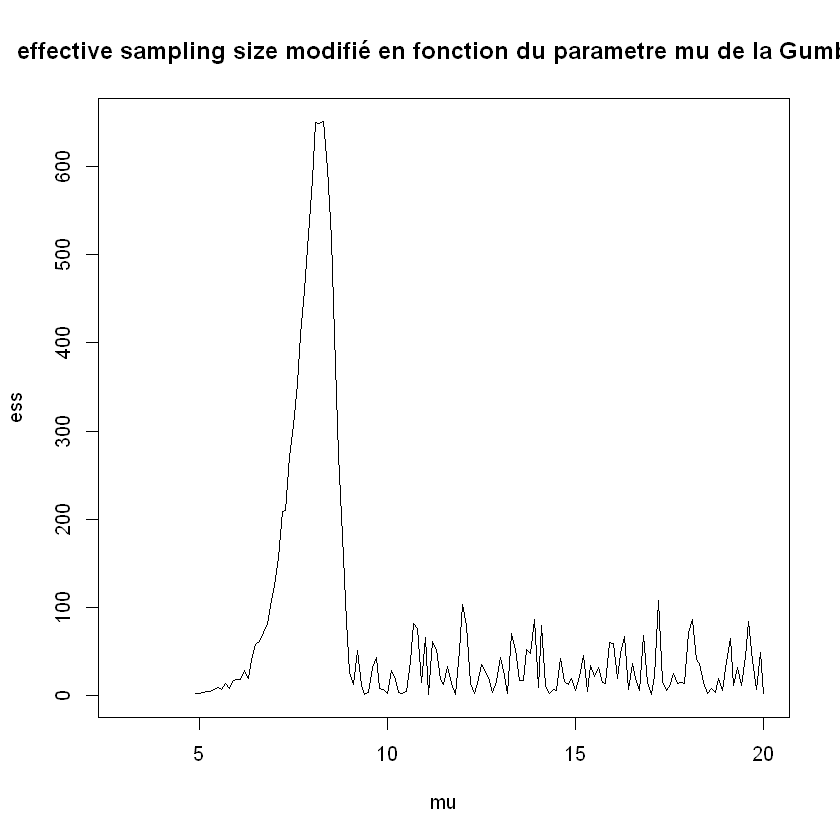

In [73]:
# Effective sample size
ess_gumbel = function(a = 8, nb_realisations = 1000,  b = 0.5,  n = 1000, lambda = 2){
  t=8
  x = simGumbel(nb_realisations, a, b)
  indicatrice  =  ifelse(x>t,  1,  0)
  w = sum(dexp(x,  lambda)*n*pexp(x, lambda)^(n-1)*indicatrice/dgumbel(x,  a, b))
  w1 = sum((dexp(x,  lambda)*n*pexp(x, lambda)^(n-1)*indicatrice/dgumbel(x,  a, b))^{2})
  return(w^{2}/w1)
}


print(paste0("Ess avec mu = a= 7 : ", ess_gumbel(a = 7)))

print(paste0("Ess avec mu = a= 8 : ", ess_gumbel(a = 8)))
      
print(paste0("Ess avec mu = a= 9 : ", ess_gumbel(a = 9)))
a = seq (3, 20, 0.1)
plot(a, sapply(a,ess_gumbel ), type = "l", main = "effective sampling size modifié en fonction du parametre mu de la Gumbel", 
     xlab = "mu", ylab = "ess")

On  effectue l'estimation

In [54]:
# Importance Sampling

importance_sampling = function(nb_realisations  =  1000, lambda  =  2, a =  8, b  = 0.5, t = 8){

    
    x  = simGumbel(nb_realisations, a, b)
    indicatrice  =  ifelse(x>t,  1,  0)
    
    # Calcul des hf/g
    integrande =  dexp(x,  lambda)*n*pexp(x, lambda)^(n-1)*indicatrice/dgumbel(x,  a, b)
    
    
    p_hat2  =  mean(integrande)
    sigma2_p = var(integrande)
    return (c(p_hat2,sigma2_p))
}

is = importance_sampling( a= 8)
p_is = is[1]
sigma2_is =  is[2]

print(paste0("Estimation de p : ", p_is))

print(paste0("Variance ", sigma2_is))

nb_realisations = 1000
q = qnorm(0.975)
print(paste0(" Intervalle de Confiance: ",  p_is - q *sqrt(sigma2_is/nb_realisations),  " ", 
             p_is + q *sqrt(sigma2_is/nb_realisations)   ))



[1] "Estimation de p : 0.000110835255061891"
[1] "Variance 8.39873139720754e-09"
[1] " Intervalle de Confiance: 0.000105155168723776 0.000116515341400006"


### Q3 Efficacité relative

La méthode d'échantillonage préférentiel est plus de 800 000 fois plus efficace que la méthode de Monte Carlo classsique car elle permet de réduire de maniere importante la variance

In [55]:
# Efficacité relative
nb_fois = 10

time1 = mean(microbenchmark(estim_rare_classique2() , times =nb_fois)$time)

var1 = mean(sapply(rep(10000, nb_fois), estim_rare_classique2) [2,])

time2 = mean(microbenchmark(importance_sampling() , times =nb_fois)$time)

var2 = mean(sapply(rep(10000, nb_fois), importance_sampling) [2,])


eff = time1*var1/(time2*var2)

print(paste0(" Efficacité relative   " , eff))

print(paste0(" Variance monte carlo classique   " , var1))

print(paste0(" Variance importance_sampling   " , var2))

[1] " Efficacité relative   885186.691329297"
[1] " Variance monte carlo classique   0.0001099899989999"
[1] " Variance importance_sampling   9.08362854427993e-09"


### Q4. (a) Partant de l’estimateur d’échantillonage préférentiel, construire un nouvel estimateur de p à l’aide de la méthode de la variable antithétique.


Notre variable antithétique est définie par:

$A(X) = G^{-1}(1-G(X))$

avec X simulée selon $g$ , la loi d'importance et $G$ sa fonction de répartition

En effet , on sait que $G$ (loi gumbel)  admet une fonction reciproque $G^{-1}$

\begin{align}
\mathbb{P}(A(X) < a) &= \mathbb{P}(G^{-1}(1-G(X)) <a) \\
                     &= \mathbb{P}((G(X) >-G(a)+1) \\
                     &= \mathbb{P}((X >G^{-1}(-G(a)+1)) \\
                     &= 1-G(G^{-1}(-G(a)+1)) \\
                     &= 1-(-G(a)+1)) \\
                     &= G(a)
\end{align}

Donc $A(X)$ et $X$ suivent la même loi.
De plus $A(X)$ et $X$ ont des monotonies opposées

L'estimateur est défini par
\begin{align}
\widehat{p}_{n}=\frac{1}{n} \sum_{k=1}^{n} \frac{H\left(\mathbf{X}_{k}\right)+H \circ A\left(\mathbf{X}_{k}\right)}{2}
\end{align}

avec la fonction  $H = \displaystyle\frac{hf}{g}$

La variance des réalisations est  

$\sigma_{1}^{2}=\operatorname{Var}[0.5\{H(\mathbf{X})+H \circ A(\mathbf{X})\}]$ 

estimée par  $\widehat{\sigma}_{1}^{2}=\frac{1}{n-1} \sum_{k=1}^{n}\left(0.5\left\{H\left(\mathbf{X}_{k}\right)+H \circ A\left(\mathbf{X}_{k}\right)\right\}-\widehat{p}_{n}\right)^{2}$

In [57]:
# Antithétique



var_estim_antithetique = function(nb_realisations  =  1000, lambda  =  2, a =  8, b  = 0.5, t = 8){

    
    x  = simGumbel(nb_realisations, a, b)
    A_x  =  -b*log(-log((1-pgumbel(x, a, b))))+a # Variable antithetique
  
    indicatrice  =  ifelse(x>t,  1,  0)
    indicatrice2  =  ifelse(A_x>t,  1,  0)
    
    #H(X)
    integrande =  dexp(x,  lambda)*n*pexp(x, lambda)^(n-1)*indicatrice/dgumbel(x,  a, b)
    #H(A(X))
    integrande2 =  dexp(A_x,  lambda)*n*pexp(A_x, lambda)^(n-1)*indicatrice2/dgumbel(A_x,  a, b) 
    
    
    h = 0.5*(integrande + integrande2)
    p_hat2  =  mean(h)
    sigma2_p = var(h)
    return (c(p_hat2,sigma2_p))
}

nb_realisations = 1000

estim_anti = var_estim_antithetique()
p_hat = estim_anti[1]
sigma_2 = estim_anti[2]

print(paste0("Estimation de p : ", p_hat))

print(paste0("Variance ", sigma_2))


q = qnorm(0.975)
print(paste0(" Intervalle de Confiance: ",  p_hat - q *sqrt(sigma_2/nb_realisations),  " ", 
             p_hat + q *sqrt(sigma_2/nb_realisations)   ))



[1] "Estimation de p : 0.000114868980750459"
[1] "Variance 5.25568452766805e-09"
[1] " Intervalle de Confiance: 0.000110375708480988 0.00011936225301993"


### (b) Que pouvez-vous dire de l’efficacité relative de cet estimateur par rapport à l’estimateur d’échantillonage préférentiel ? Si cette modification de l’estimateur permet de réduire la variance de la méthode d’estimation, expliquer pourquoi.

L’estimateur d’échantillonage préférentiel est presque 2 fois moins efficace que celui selon la méthode de la variable antithétique (appliquée a l'échantillonage préférentiel) . Cela vient du fait que cette méthode  réduit  la variance de moitié.

On peut constater qu'il n'y a quasiment pas de corrélation entre $H(X)$ et $H(A(X))$ , ce qui explique que la variable antithétique appliquée a l'échantillonage préférentiel  soit équivalente a l'échantillonage préférentiel (classique) avec deux fois plus de tirages. Aussi , cela montre que le coût d'évaluation de $H(A(X))$ est faible devant le coût de simulation.

In [62]:
# Corrélation entre H(X) et H(A(X))

a=1
b=2
nb_realisations =1000
lambda =2
n =1000
t = 8
x  =  simGumbel(nb_realisations,  a, b)
A_x  =  -b*log(-log((1-pgumbel(x, a, b))))+a # Variable antithetique
indicatrice1  =  ifelse(x>t,  1,  0)
indicatrice2  =  ifelse(A_x>t,  1,  0)
  
  
integrande1 =  dexp(x,  lambda)*n*pexp(x, lambda)^(n-1)*indicatrice1/dgumbel(x,  a, b) #H(X)
integrande2 =  dexp(A_x,  lambda)*n*pexp(A_x, lambda)^(n-1)*indicatrice2/dgumbel(A_x,  a, b) # H(A(X))

print(paste0("La Corrélation entre H(X) et H(A(X)) = ", cor(integrande1, integrande2)))

[1] "La Corrélation entre H(X) et H(A(X)) = -0.0116304957700412"


In [59]:
# Efficacité relative importance_sampling / antithetique
nb_fois = 100

time1 = mean(microbenchmark(importance_sampling() , times =nb_fois)$time)

var1 = mean(sapply(rep(1000, nb_fois),importance_sampling ) [2,])

time2 = mean(microbenchmark(var_estim_antithetique() , times =nb_fois)$time)

var2 = mean(sapply(rep(1000, nb_fois), var_estim_antithetique) [2,])


eff = time1*var1/(time2*var2)

print(paste0(" Efficacité relative   " , eff))

print(paste0(" Variance importance_sampling   " , var1))

print(paste0(" Variance antithetique " , var2))



[1] " Efficacité relative   1.5261120620283"
[1] " Variance importance_sampling   9.12844248041776e-09"
[1] " Variance antithetique 5.06245539602812e-09"


# Exercice 2

### Question 1 ; Donner une estimation de p par la méthode de Monte Carlo classique. On donnera l’intervalle de confiance au niveau 95%

$p = \mathbb{P} (X<3)$

Avec $X=\left\{\begin{array}{ll}{0} & {, \text { si } S=0} \\ {\sum_{s=1}^{S} Q_{s}} & {, \text { sinon. }}\end{array}\right.$ 


Ainsi l'estimateur selon la méthode de  monte carlo classique est 

$\widehat{p} = \displaystyle\sum_{i=1}^{n} \mathbb{1}_{(\sum_{k=1}^{S_{i}} Q_{k} \mathbb{1}_{S>0} )<3}$

Avec $S_{i}$ simulés selon une poisson de paramètre $\lambda = 3.7$ et $Q_{k}$ selon une  Weibull de  paramètre de forme $k = 0.5$ et de paramètre d’échelle $\lambda = 2$.

Pour chaque réalisation de $X$ , on simule $S$ et ensuite on simule $X|S = \sum_{k=1}^{S} Q_{k} \mathbb{1}_{S>0}$, on prend ensuite l'indicatrice $\mathbb{1}_{X<3}$

On calcule l'intervalle de confiance asymptotique : on peut appliquer le TCL car l'indicatrice $\mathbb{1}_{X<3}$ est intégrable

$\mathbb{P}\left[\sqrt{\frac{n}{\sigma^{2}}}\left(\widehat{p}_{n}-p\right) \leq z\right]_{n \rightarrow+\infty}\longrightarrow\Phi(z)$

On en déduit l’intervalle de confiance bilatéral symétrique au niveau de confiance asymptotique
1−α

$\mathrm{IC}_{1-\alpha}=\left[\hat{p}_{n}-q_{1-\alpha / 2} \sqrt{\frac{\sigma^{2}}{n}}, \hat{p}_{n}+q_{1-\alpha / 2} \sqrt{\frac{\sigma^{2}}{n}}\right] \quad$ avec $\quad \Phi\left(q_{1-a / 2}\right)=1-\frac{\alpha}{2}$

In [63]:
# Monte Carlo Classique
estim_pluie_classique = function(nb_realisations  =  1000, lambda  =  3.7, k  =  0.5, echelle  =  2  ){     

S  =  rpois(nb_realisations, lambda )
Q  = lapply(S,  rweibull, shape  =  k, scale =  echelle )
x  =  sapply(Q,  sum)

indicatrice  =  ifelse(x<3,  1,  0)

p_pluie  =  mean(indicatrice )
sigma2_pluie  =  var(indicatrice)
 
return(c(p_pluie, sigma2_pluie))
}

q =  qnorm(0.975)
nb_realisations  =  1000

estim_pluie = estim_pluie_classique()

p_pluie = estim_pluie[1]
sigma2_pluie =  estim_pluie[2]

print(paste0("Estimation de p: ", p_pluie))

print(paste0("Variance ", sigma2_pluie))
print(paste0(" Intervalle de Confiance: ",  p_pluie - q *sqrt(sigma2_pluie/nb_realisations),  " ", 
             p_pluie + q *sqrt(sigma2_pluie/nb_realisations)   ))


[1] "Estimation de p: 0.247"
[1] "Variance 0.186177177177177"
[1] " Intervalle de Confiance: 0.220256926887899 0.273743073112101"


### Q2. (a) Donner une estimation de p par la méthode de stratification avec allocation proportionnelle, en précisant les strates utilisées. On donnera l’intervalle de confiance au niveau 95%.


Il est naturel de choisir comme  variable de stratification $S$  puisque on peut facilement simuler 
$X|S=k$ (on le fait déjà dans le cadre de la méthode de monte carlo classique) . $S$  a pour support $\mathbb{N}$ Donc  la partition la plus fine pour $S$ est l'ensemble des évenements ${S=k}$  avec $k$ qui parcourt $\mathbb{N}$. Mais comme cette partition est infinie, on choisit de s'arrêter au bout d'un certain $K$ et de prendre comme dernière strate $\{S>K\}$ en définissant la partition $P$ suivante:

$P = \{\{S=k\} \text{tel que } k<K \} \cup \{\{S>K\}\}$ , $k$ et $K$ entiers positifs.

Il suffit de prendre  $K$ grand et tel que $n\mathbb{P}(S<K)  \geq 1$  de telle sorte que lors de l'allocation proportionelle on ait au moins une réalisation allouée à cette dernière strate.

Selon la méthode d'allocation proportionelle, on alloue $n_{k} = np_{k}$  réalisations de la variable   $X|S=k$ a la strate $D_{k}$, $n$ étant le nombre de réalisations total et $p_{k} = \mathbb{P} (D_{k})$ pour tout évènement $D_{k}$ appartenant a la partition $P$

L'estimateur  est alors $\widehat{p}_{n}\left(n_{1}, \ldots, n_{K}\right)=\sum_{k=1}^{K} \frac{\mathbb{P}\left[\mathbf{S} =k\right]}{n_{k}} \sum_{i=1}^{n_{k}} h\left(\mathbf{X}| S=k\right) + \frac{\mathbb{P}\left[\mathbf{S} >K\right]}{n_{K}}\sum_{i=1}^{n_{K}} h\left(\mathbf{X}| S>K\right)$

avec $h(X) = \mathbb{1}_ {X>3}$

La variance des evaluations (dont notre estimateur est la moyenne) est estimée comme suit 

$\hat{\sigma}_{n}^{2}\left(q_{1}, \ldots, q_{K}\right)=\sum_{k=1}^{K} \frac{p_{k}^{2}}{q_{k}} \frac{1}{n_{k}-1} \sum_{i=1}^{n_{k}}\left\{h\left(\mathbf{x}_{i}^{(k)}\right)-\frac{1}{n_{k}} \sum_{j=1}^{n_{k}} h\left(\mathbf{x}_{j}^{(k)}\right)\right\}^{2}$

avec  $q_{K} = \frac{n_{k}}{n}$ et $n$ le nombre de réalisations total

avec $\mathbf{x}^{(k)}$ la variable aleatoire $X|D_{k}$ , pour tout évènement $D_{k}$ appartenant a la partition $P$

On retourne un Intervalle de confiance asymptotique

$\mathrm{IC}_{1-\alpha}=\left[\widehat{p}_{n}-q_{1-\alpha / 2} \frac{\widehat{\sigma}\left(q_{1}, \ldots, q_{K}\right)}{\sqrt{n}}, \hat{p}_{n}+q_{1-\alpha / 2} \frac{\widehat{\sigma}\left(q_{1}, \ldots, q_{K}\right)}{\sqrt{n}}\right]$


Pour 1000 réalisations on doit choisir {S>10} comme dernière strate :

In [64]:


# Si on choisit {S>11} comme dernière strate, 
#on n'aura pas d'allocation pour la derniere strate pour 1000 réalisations
last_strate = 11
nb_realisations = 1000 
print(paste0("Allocation pour la strate S>11  ", (1-ppois(last_strate,lambda))* nb_realisations) )#on vérifie qu'on a au moins une  réalisation allouée à cette dernière strate


# Donc On choisit {S>10} comme dernière strate 
last_strate = 10
lambda = 3.7
nb_realisations = 1000 
print(paste0("Allocation pour la  strate S>10 ", (1-ppois(last_strate,lambda))* nb_realisations) )#on vérifie qu'on a au moins une  réalisation allouée à cette dernière strate



[1] "Allocation pour la strate S>11  0.00136461515964914"
[1] "Allocation pour la  strate S>10 1.57218100091772"


In [66]:
# Estimateur stratifie allocation proportionelle




estim_strat_prop= function(nb_realisations  =  1000, lambda  =  3.7, k  =  0.5, 
                                 echelle  =  2, last_strate = 10  ){



    p= c(dpois(0:last_strate,lambda), 1-ppois(last_strate,lambda)) # probabilites des strates
    n = round(p*nb_realisations) # alllocation proportionelle


    strates = list()
    for (i in 0:(length(p)-2)){ # Pour chaque strate on obtient un vecteur de realisations
      x= c()
      for (j in 1:n[i+1]){
          
        
        x =append(x,sum(rweibull(i, k , echelle)) ) 
        h = ifelse(x<3, 1, 0) #indicatrice

      }
      strates [[i+1]] = h
    }

    # pour la derniere strate on utilise une poisson tronquee 

    S= rtpois(n[length(n)], lambda, a = last_strate)
    Q =lapply(S, rweibull,shape = k,scale= echelle )
    x = sapply(Q, sum)

    strates[[length(p)]] =  ifelse(x<3, 1, 0)

    p_strat_prop = sum(p*sapply(strates, mean))
    sigma_strat_prop =  sum((sapply(strates, var)*p^2)/(n/sum(n))) # Variance
    return(c(p_strat_prop,sigma_strat_prop ))

 }

estim = estim_strat_prop()

p_strat_prop = estim[1]
sigma_strat_prop =  estim[2]

print(paste0("Estimation de p ", p_strat_prop))


print(paste0("Variance ", sigma_strat_prop))

q =  qnorm(0.975)
nb_realisations  =  1000

print(paste0(" Intervalle de Confiance: ",  p_strat_prop - q *sqrt(sigma_strat_prop/nb_realisations),  " ",  
             p_strat_prop + q *sqrt(sigma_strat_prop/nb_realisations)   ))



[1] "Estimation de p 0.254121506678833"
[1] "Variance 0.127702801673394"
[1] " Intervalle de Confiance: 0.231972803468134 0.276270209889532"


### Q2   (b) Comparer les variances et l’efficacité relative des deux méthodes d’estimations. Discuter de façon concise les résultats obtenus.


On constate que la méthode de stratification avec allocation proportionelle est 3 fois moins efficace que la méthode de monte carlo classique, même si elle permet de réduire légèrement la variance. Ceci vient de l'implémentation de la méthode de stratification : elle utilise des boucles $\text{for}$ tandis que la méthode de monte carlo classique utilise la vectorisation

In [67]:
# Efficacité relative
nb_fois = 100

time1 = mean(microbenchmark(estim_strat_prop() , times =nb_fois)$time)

var1 = mean(sapply(rep(1000, nb_fois), estim_strat_prop) [2,])

time2 = mean(microbenchmark(estim_pluie_classique() , times =nb_fois)$time)

var2 = mean(sapply(rep(1000, nb_fois), estim_pluie_classique) [2,])


eff = time1*var1/(time2*var2)

print(paste0(" Efficacité relative   " , eff))

print(paste0(" Variance strates proportionelles   " , var1))

print(paste0(" Variance monte carlo classique   " , var2))

[1] " Efficacité relative   3.36791313531709"
[1] " Variance strates proportionelles   0.13874316830267"
[1] " Variance monte carlo classique   0.193891281281281"


### Q3 a) Proposer une méthode d’estimation de p par la méthode de stratification avec allocation optimale. Quelles difficultés rencontrez-vous ?


On définit notre estimateur comme précedemment

$\widehat{p}_{n}\left(n_{1}, \ldots, n_{K}\right)=\sum_{k=1}^{K} \frac{\mathbb{P}\left[\mathbf{S} =k\right]}{n_{k}} \sum_{i=1}^{n_{k}} h\left(\mathbf{X}| S=k\right) + \frac{\mathbb{P}\left[\mathbf{S} >K\right]}{n_{K}}\sum_{i=1}^{n_{K}} h\left(\mathbf{X}| S>K\right)$


avec les mêmes strates.

Cette fois-ci, les allocations sont données par

$q_{k}^{\star}=\frac{p_{k} \sigma_{k}}{\sum_{i=1}^{K} p_{i} \sigma_{i}}$

La difficulté ici est que $\sigma_{k}$ st inconnue et difficile a calculer.
On remplace $\sigma_{k}$ par son estimateur $\widehat{\sigma_{k}}$ défini précedemment et calculé sur un autre échantillon avec une allocation  uniforme (même nombre de  tirages pour chaque strate).

Si $q_{k} = 0$ pour une strate $D_{k}$, on lui alloue 2 tirages pour que notre estimateur reste sans biais. (on force 2 tirages plutot que un parce que l'estimateur de la variance n'est pas défini pour des échantillons de taile 1)


In [68]:
### Allocation optimale #####

estim_strat_opti = function( nb_realisations  =  1000, lambda  =  3.7, k  =  0.5, 
                                 echelle  =  2, last_strate = 10) {

    # Calcul des allocations (on estime les variances intra strates)
    
    last_strate =10
    p =  c(dpois(0:last_strate, lambda),  1-ppois(last_strate, lambda)) # probabilites des strates
    n  =  rep(nb_realisations/10,  length(p)) # alllocation uniforme

    

    strates  =  list()
    for (i in 0:(length(p)-2)){ # Pour chaque strate on obtient un vecteur de realisations
      x =  c()
      for (j in 1:n[i+1]){

        x  = append(x, sum(rweibull(i,  k ,  echelle)) ) 
        h  =  ifelse(x>3,  1,  0)

      }
      strates [[i+1]]  =  h
    }



    S =  rtpois(n[length(n)],  lambda,  a  =  last_strate)
    Q  = lapply(S,  rweibull, shape  =  k, scale =  echelle )
    x  =  sapply(Q,  sum)

    strates[[length(p)]]  =   ifelse(x>3,  1,  0)



    var_strates  =   sapply(strates,  var)

    q_k  =  p*sqrt( var_strates)/sum(p*sqrt( var_strates))

    ## estimation

    
    p =  c(dpois(0:last_strate, lambda),  1-ppois(last_strate, lambda)) # probabilites des strates
    n  =  round(q_k*nb_realisations) # alllocation optimale

    # On force des tirages pour  les strates qui ont une allocation nulle

    n[n<2]  =  2

    strates  =  list()
    for (i in 0:(length(p)-2)){ # Pour chaque strate on obtient un vecteur de realisations
      x =  c()
      for (j in 1:n[i+1]){

        x  = append(x, sum(rweibull(i, k , echelle)) ) 
        h  =  ifelse(x<3, 1, 0)

      }
      strates [[i+1]]  = h
    }
    
    #  derniere strate 


    S =  rtpois(n[length(n)],  lambda,  a  =  last_strate)
    Q  = lapply(S,  rweibull, shape  =  k, scale =  echelle )
    x  =  sapply(Q,  sum)

    strates[[length(p)]]  =   ifelse(x<3,  1,  0)

    p_strat_opt  =  sum(p*sapply(strates, mean))

    sigma_strat_opt  =   sum((sapply(strates, var)*p^2)/(n/sum(n)))
    return(c(p_strat_opt,sigma_strat_opt ))
 }

estim_opti = estim_strat_opti()
p_strat_opt = estim_opti[1]
sigma_strat_opt = estim_opti[2]


print(paste0("Estimation de p ", p_strat_opt))


print(paste0("Variance ", sigma_strat_opt))

q =  qnorm(0.975)
nb_realisations  =  1000

print(paste0(" Intervalle de Confiance Asymptotique: ",  p_strat_opt - q *sqrt(sigma_strat_opt/nb_realisations),  " ",  p_strat_opt + q *sqrt(sigma_strat_opt/nb_realisations)))




[1] "Estimation de p 0.268726114447987"
[1] "Variance 0.137558299496803"
[1] " Intervalle de Confiance Asymptotique: 0.245738627787596 0.291713601108379"


### Q3 (b) Comparer les variances et l’efficacité relative de ces trois méthodes d’estimations. Discuter de façon concise les résultats obtenus

On constate que la méthodes de stratification avec allocation otpimale est presque 2 fois moins efficace que celle avec allocation proportionelle, même si elle réduit très légèrement la variance. Cela vient du fait que l'allocation optimale nécessite de calculer une estimation des variances sur un autre echantillon et donc prend forcement plus de temps de calcul que l'allocation proportionelle.



In [69]:
# Efficacité relative allocation proportionelle vs Optimale
nb_fois = 100

time1 = mean(microbenchmark(estim_strat_opti() , times =nb_fois)$time)

var1 = mean(sapply(rep(1000, nb_fois),estim_strat_opti ) [2,])

time2 = mean(microbenchmark(estim_strat_prop() , times =nb_fois)$time)

var2 = mean(sapply(rep(1000, nb_fois), estim_strat_prop) [2,])


eff = time1*var1/(time2*var2)

print(paste0(" Efficacité relative   " , eff))

print(paste0(" Variance strates proportionelles   " , var1))

print(paste0(" Variance allocation otpimale  " , var2))



# Efficacité relative Classique vs Optimale
nb_fois = 100

time1 = mean(microbenchmark(estim_strat_opti() , times =nb_fois)$time)

var1 = mean(sapply(rep(1000, nb_fois),estim_strat_opti ) [2,])

time2 = mean(microbenchmark(estim_pluie_classique() , times =nb_fois)$time)

var2 = mean(sapply(rep(1000, nb_fois), estim_pluie_classique) [2,])


eff = time1*var1/(time2*var2)

print(paste0(" Efficacité relative   " , eff))

print(paste0(" Variance strates proportionelles   " , var1))

print(paste0(" Variance monte carlo classique  " , var2))

[1] " Efficacité relative   2.21361791193946"
[1] " Variance strates proportionelles   0.128740245656526"
[1] " Variance allocation otpimale  0.13861401499749"
[1] " Efficacité relative   6.48746732663944"
[1] " Variance strates proportionelles   0.126126710792994"
[1] " Variance monte carlo classique  0.192842502502503"
